# LAPAGE

# 0. Nettoyage

* Présentez l'ensemble des choix et actions que vous avez réalisés
* Restitution de l'analyse : les chiffres clés, KPI, graphiques générés, corrélations calculées, ...
* Calcul de l'indicateur de corrélation (R², eta², Chi²) et la mise en place d'un test statistique est nécessaire

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import missingno as msno
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
from functions import *
from scipy.stats import pearsonr 
from os import getcwd

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"

Chargement des données...


In [3]:
print(file_path)

c:\Users\User\WORK\wokspace-simplon3\simplon\projets\lapage\


In [4]:
file_name_customers = 'customers.csv'
file_name_procuts = 'products.csv'
file_name_transactions = 'transactions.csv'

df_customers = pd.read_csv(file_path+file_name_customers, sep=',')
df_products = pd.read_csv(file_path+file_name_procuts, sep=',')
df_transactions = pd.read_csv(file_path+file_name_transactions, sep=',')

print("Chargement des données", df_customers.shape,df_products.shape,df_transactions.shape, ".... ...................................... END")

Chargement des données (8623, 3) (3287, 3) (679532, 4) .... ...................................... END


In [5]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
df_customers["client_id"].nunique()

8623

In [7]:
df_customers = df_customers.drop_duplicates("client_id", keep='first')
df_customers.shape

(8623, 3)

In [8]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
df_products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Il ne peut pas y avoir de produit avec un prix négatif, supression des produits avec un prix négatif

In [10]:
df_products_clean = df_products[df_products["price"]>=0]
print(df_products.shape, "vs", df_products_clean.shape)

(3287, 3) vs (3286, 3)


In [11]:
df_products_clean["id_prod"].nunique()

3286

In [12]:
df_products_clean.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
print(df_products_clean.shape, end="")
df_products_clean = df_products_clean.drop_duplicates("id_prod", keep='first')
df_products_clean.shape

(3286, 3)

(3286, 3)

In [14]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [15]:
df_transactions.duplicated(subset=['id_prod', 'date', 'session_id', 'client_id']).value_counts()

False    679406
True        126
dtype: int64

Il semble y avoir des doublons dans le fichier de transactions, nous allons zoomer dessus

In [16]:
df_doublon = df_transactions[df_transactions.duplicated(subset=['id_prod', 'date', 'session_id', 'client_id'])]
df_doublon

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


il semblerait que les produits soient tous "T_0" à voir, peut-être s'agit-il d'un test, la date indiquée semble confirmer qu'il s'agit d'un test.

In [17]:
df_doublon["id_prod"].value_counts()

T_0    126
Name: id_prod, dtype: int64

In [18]:
df_products[df_products["id_prod"]=="T_0"]

,id_prod,price,categ
731,T_0,-1.0,0


In [19]:
df_products[df_products["id_prod"]=="0_2245"]

,id_prod,price,categ


In [20]:
df_transactions_clean = df_transactions[df_transactions["id_prod"]!="T_0"]
print(df_transactions.shape, "vs", df_transactions_clean.shape)

(679532, 4) vs (679332, 4)


In [21]:
df_transactions_clean.duplicated(subset=['id_prod', 'date', 'session_id', 'client_id']).value_counts()

False    679332
dtype: int64

On créé un DF global avec toutes les informations

In [22]:
print(df_transactions_clean.shape, end="")
df_global = df_transactions_clean.merge(df_products_clean, on="id_prod", how='outer', indicator=True)
df_global.shape

(679332, 4)

(679353, 7)

In [23]:
print(df_transactions_clean.shape, end="")
df_global = df_transactions_clean.merge(df_products_clean, on="id_prod", how='outer', indicator=True)
df_global.shape

(679332, 4)

(679353, 7)

In [24]:
df_global.head()

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0,both


In [25]:
df_global["_merge"].value_counts()

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64

In [26]:
not_commons = df_global[df_global["_merge"]!="both"]
not_commons.shape

(242, 7)

In [27]:
not_commons.head()

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only


In [28]:
not_commons.isna().sum()

id_prod         0
date           21
session_id     21
client_id      21
price         221
categ         221
_merge          0
dtype: int64

In [29]:
not_commons[not_commons["price"].isna()]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


In [30]:
not_commons[not_commons["price"].isna()].describe(include="all")

,id_prod,date,session_id,client_id,price,categ,_merge
count,221,221,221,221,0.0,0.0,221
unique,1,221,221,100,NaN,NaN,1
top,0_2245,2022-09-23 07:22:38.636773,s_272266,c_1533,NaN,NaN,left_only
freq,221,1,1,6,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


le produit 0_2245 n'apparaît pas dans la base de produit.
Il a pu être sortit de la base ou erreur ?

In [31]:
df_global_clean =  df_global[df_global["id_prod"]!="0_2245"]
df_global_clean.shape

(679132, 7)

In [32]:
not_commons = df_global_clean[df_global_clean["_merge"]!="both"]
not_commons.shape

(21, 7)

In [33]:
not_commons.describe(include="all")

,id_prod,date,session_id,client_id,price,categ,_merge
count,21,0,0,0,21.000000,21.000000,21
unique,21,0,0,0,NaN,NaN,1
top,0_1016,NaN,NaN,NaN,NaN,NaN,right_only
freq,1,NaN,NaN,NaN,NaN,NaN,21
mean,NaN,NaN,NaN,NaN,37.870476,0.380952,NaN
std,NaN,NaN,NaN,NaN,56.619963,0.740013,NaN
min,NaN,NaN,NaN,NaN,0.800000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,2.990000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,22.050000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,31.820000,0.000000,NaN


In [34]:
not_sales_product = not_commons
not_sales_product.head(21)

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaN,NaN,NaN,2.99,0.0,right_only


In [35]:
print(df_global_clean.shape, "vs", end="")
df_global_clean = df_global_clean[df_global_clean["_merge"]=="both"]
df_global_clean.shape

(679132, 7) vs

(679111, 7)

In [36]:
df_global_clean["_merge"].value_counts()

both          679111
left_only          0
right_only         0
Name: _merge, dtype: int64

In [37]:
df_global_clean1 = df_global_clean[["id_prod","date","session_id","client_id","price","categ"]]
df_global_clean1.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0


In [38]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [39]:
print(df_global_clean1.shape, end="")
df_global_full_merge = df_global_clean1.merge(df_customers, on="client_id", how='outer', indicator=True)
df_global_full_merge.shape

(679111, 6)

(679134, 9)

In [40]:
df_global_full_merge["_merge"].value_counts()

both          679111
right_only        23
left_only          0
Name: _merge, dtype: int64

In [41]:
customers_who_never_buy = df_global_full_merge[df_global_full_merge["_merge"]!="both"]
customers_who_never_buy.head(25)

,id_prod,date,session_id,client_id,price,categ,sex,birth,_merge
679111,NaN,NaN,NaN,c_8253,NaN,NaN,f,2001,right_only
679112,NaN,NaN,NaN,c_3789,NaN,NaN,f,1997,right_only
679113,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998,right_only
679114,NaN,NaN,NaN,ct_0,NaN,NaN,f,2001,right_only
679115,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967,right_only
679116,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959,right_only
679117,NaN,NaN,NaN,c_4447,NaN,NaN,m,1956,right_only
679118,NaN,NaN,NaN,c_3017,NaN,NaN,f,1992,right_only
679119,NaN,NaN,NaN,c_4086,NaN,NaN,f,1992,right_only
679120,NaN,NaN,NaN,c_6930,NaN,NaN,m,2004,right_only


In [42]:
customers_who_never_buy.shape

(23, 9)

In [43]:
print(df_global_full_merge.shape, end="")
df_global_full = df_global_full_merge[df_global_full_merge["_merge"]=="both"]
df_global_full.shape

(679134, 9)

(679111, 9)

In [44]:
df_global_full = df_global_full[["id_prod","date","session_id","client_id","price","categ","sex","birth"]]
df_global_full.shape

(679111, 8)

In [45]:
df_global_full.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

Maintenant que nous avons un DF global nous pouvons nettoyer, organiser et typer les données

In [46]:
df_global_full.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986


In [47]:
df_global_full.describe(include="all")

,id_prod,date,session_id,client_id,price,categ,sex,birth
count,679111,679111,679111,679111,679111.000000,679111.000000,679111,679111.000000
unique,3265,679111,342275,8600,NaN,NaN,2,NaN
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609,NaN,NaN,m,NaN
freq,2252,1,14,25488,NaN,NaN,340826,NaN
mean,NaN,NaN,NaN,NaN,17.454773,0.441953,NaN,1977.811149
std,NaN,NaN,NaN,NaN,18.328998,0.595042,NaN,13.575361
min,NaN,NaN,NaN,NaN,0.620000,0.000000,NaN,1929.000000
25%,NaN,NaN,NaN,NaN,8.870000,0.000000,NaN,1970.000000
50%,NaN,NaN,NaN,NaN,13.990000,0.000000,NaN,1980.000000
75%,NaN,NaN,NaN,NaN,18.990000,1.000000,NaN,1987.000000


In [48]:
# Réorganisation des colonnes suivant un ordre plus fonctionnel
df_global_ordered = df_global_full[["date", "client_id", "sex", "birth","session_id", "id_prod", "categ", "price"]]
df_global_ordered.head()

,date,client_id,sex,birth,session_id,id_prod,categ,price
0,2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0.0,4.18
1,2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0.0,4.18
2,2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0.0,4.18
3,2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0.0,8.57
4,2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0.0,8.57


In [49]:
df_global_ordered.dtypes

date           object
client_id      object
sex            object
birth           int64
session_id     object
id_prod        object
categ         float64
price         float64
dtype: object

In [50]:
df_global_ordered["categ"] = df_global_ordered["categ"].astype(int)
df_global_ordered["sex"] = df_global_ordered["sex"].astype('category')
df_global_ordered["date"] = pd.to_datetime(df_global_ordered["date"])
df_global_ordered.dtypes

date          datetime64[ns]
client_id             object
sex                 category
birth                  int64
session_id            object
id_prod               object
categ                  int32
price                float64
dtype: object

In [51]:
df_global_ordered['month_year'] = pd.to_datetime(df_global_ordered["date"]).dt.to_period('M')
df_global_ordered['year'] = pd.to_datetime(df_global_ordered["date"]).dt.to_period('Y')
df_global_ordered['day'] = pd.to_datetime(df_global_ordered["date"]).dt.to_period('D')
df_global_ordered.head()

,date,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
0,2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20
1,2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20
2,2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20
3,2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18
4,2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18


In [52]:
print(df_global_ordered.shape)
df_global_ordered["date"].nunique()

(679111, 11)


679111

Les dates sont uniques, nous pouvons donc les mettre en index

In [53]:
df_global_index = df_global_ordered.set_index("date")
df_global_index.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
date,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18


In [54]:
df_global_index["categ"].value_counts()

0    415459
1    227169
2     36483
Name: categ, dtype: int64

In [55]:
df_global_index.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
date,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18


<AxesSubplot:>

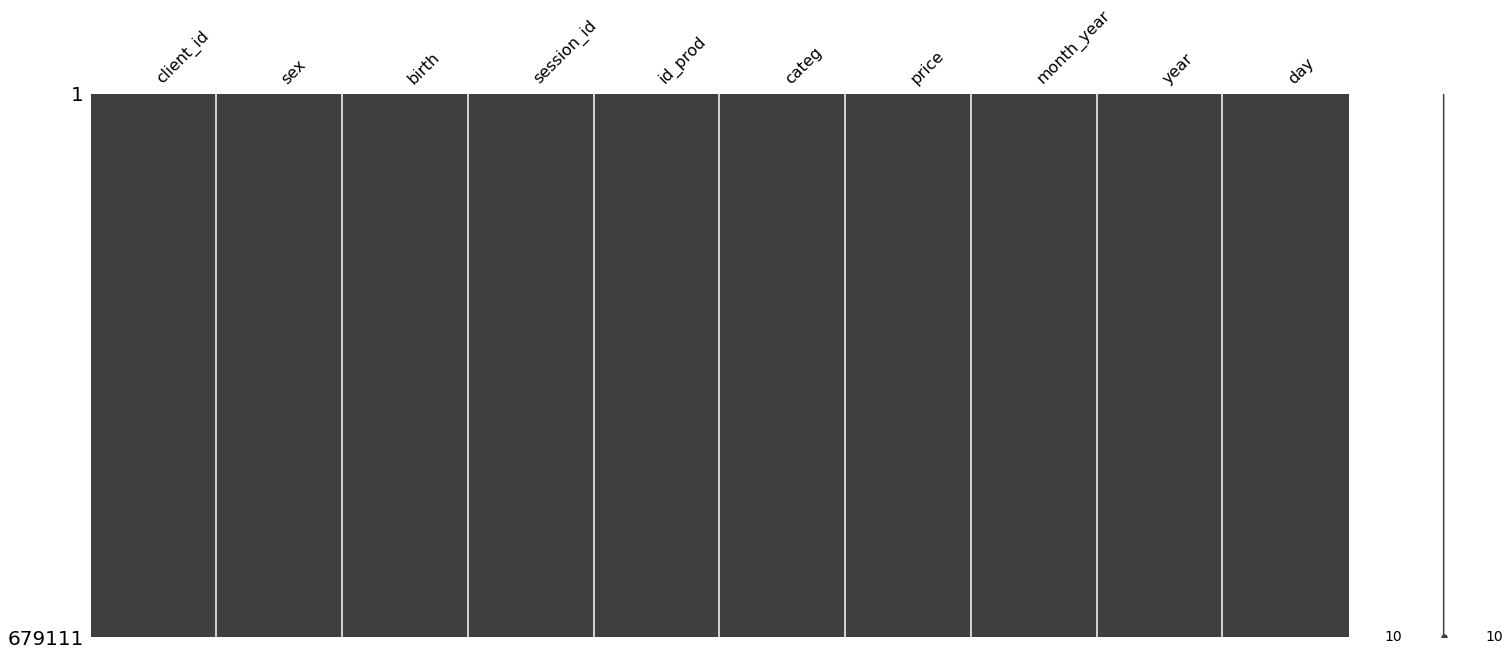

In [56]:
msno.matrix(df_global_index)

<AxesSubplot:>

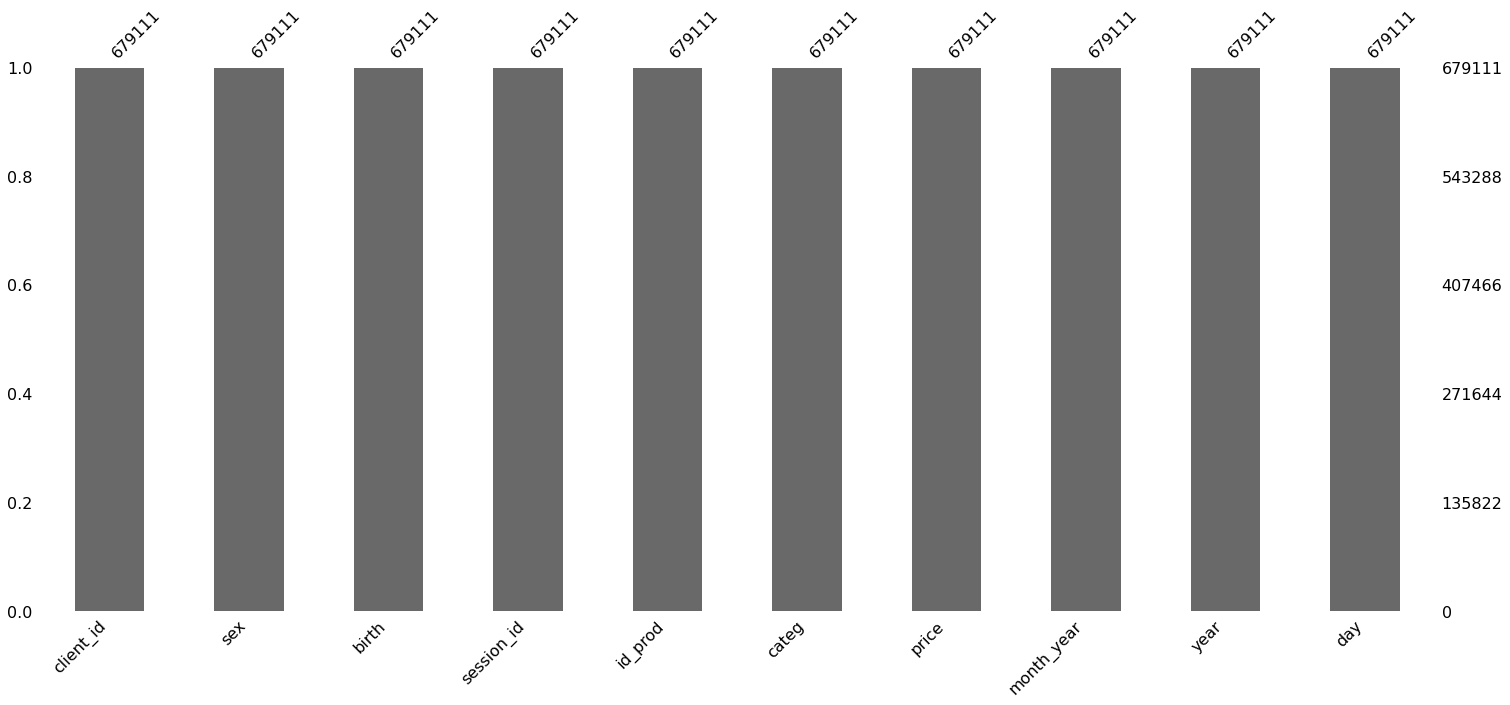

In [57]:
msno.bar(df_global_index)

In [58]:
df_global_index.describe(include="all")

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
count,679111,679111,679111.000000,679111,679111,679111.000000,679111.000000,679111,679111,679111
unique,8600,2,NaN,342275,3265,NaN,NaN,24,3,730
top,c_1609,m,NaN,s_118668,1_369,NaN,NaN,2021-09,2022,2022-11-30
freq,25488,340826,NaN,14,2252,NaN,NaN,33314,346380,1311
mean,NaN,NaN,1977.811149,NaN,NaN,0.441953,17.454773,NaN,NaN,NaN
std,NaN,NaN,13.575361,NaN,NaN,0.595042,18.328998,NaN,NaN,NaN
min,NaN,NaN,1929.000000,NaN,NaN,0.000000,0.620000,NaN,NaN,NaN
25%,NaN,NaN,1970.000000,NaN,NaN,0.000000,8.870000,NaN,NaN,NaN
50%,NaN,NaN,1980.000000,NaN,NaN,0.000000,13.990000,NaN,NaN,NaN
75%,NaN,NaN,1987.000000,NaN,NaN,1.000000,18.990000,NaN,NaN,NaN


In [59]:
df_global_index.index.min()

Timestamp('2021-03-01 00:01:07.843138')

In [60]:
df_global_index.index.max()

Timestamp('2023-02-28 23:58:30.792755')

In [61]:
df_global_ordered.dtypes

date          datetime64[ns]
client_id             object
sex                 category
birth                  int64
session_id            object
id_prod               object
categ                  int32
price                float64
month_year         period[M]
year           period[A-DEC]
day                period[D]
dtype: object

Regarder les valeurs abérentes et atypique

Note des données à analyser remarquée dans le describe :
- Livre à 300 €
- Client qui apparaît 25488 fois (c_1609)
- Date de session > à la date du jour => non possible...

In [62]:
df_300 = df_global_index[df_global_index["price"]==300]
df_300.head(15)

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
date,,,,,,,,,,
2022-12-07 06:52:26.810576,c_4958,m,1999,s_308301,2_2,2,300.0,2022-12,2022,2022-12-07
2021-12-07 06:52:26.810576,c_4958,m,1999,s_130658,2_2,2,300.0,2021-12,2021,2021-12-07
2022-06-07 06:52:26.810576,c_4958,m,1999,s_220074,2_2,2,300.0,2022-06,2022,2022-06-07
2022-08-07 06:52:26.810576,c_4958,m,1999,s_249625,2_2,2,300.0,2022-08,2022,2022-08-07
2021-12-04 15:45:14.708313,c_4958,m,1999,s_129351,2_2,2,300.0,2021-12,2021,2021-12-04
2021-03-26 04:33:19.697459,c_4958,m,1999,s_11582,2_2,2,300.0,2021-03,2021,2021-03-26
2021-05-02 18:34:47.753888,c_2329,f,1996,s_28956,2_2,2,300.0,2021-05,2021,2021-05-02
2021-06-12 08:44:00.882917,c_5237,m,1999,s_47558,2_2,2,300.0,2021-06,2021,2021-06-12
2022-08-12 08:44:00.882917,c_5237,m,1999,s_252144,2_2,2,300.0,2022-08,2022,2022-08-12


In [63]:
df_300["id_prod"].value_counts()

2_2    15
Name: id_prod, dtype: int64

In [64]:
df_global_index["id_prod"].value_counts()

1_369     2252
1_417     2189
1_414     2180
1_498     2128
1_425     2096
          ... 
0_1284       1
0_2201       1
0_1728       1
0_807        1
2_98         1
Name: id_prod, Length: 3265, dtype: int64

In [65]:
top_customer = df_global_index[df_global_index["client_id"]=="c_1609"]
top_customer

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
date,,,,,,,,,,
2022-04-27 17:10:40.102676,c_1609,m,1980,s_200245,0_1518,0,4.18,2022-04,2022,2022-04-27
2021-12-20 04:12:39.844775,c_1609,m,1980,s_137046,0_1518,0,4.18,2021-12,2021,2021-12-20
2023-02-15 15:20:37.281734,c_1609,m,1980,s_342011,0_1518,0,4.18,2023-02,2023,2023-02-15
2021-05-27 17:10:40.102676,c_1609,m,1980,s_40318,0_1518,0,4.18,2021-05,2021,2021-05-27
2021-10-13 18:00:08.691379,c_1609,m,1980,s_104281,0_1518,0,4.18,2021-10,2021,2021-10-13
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 22:55:19.039643,c_1609,m,1980,s_159074,0_1423,0,2.99,2022-02,2022,2022-02-02
2021-11-01 07:26:17.783922,c_1609,m,1980,s_113092,0_1871,0,1.99,2021-11,2021,2021-11-01
2021-06-11 15:31:20.504586,c_1609,m,1980,s_47243,0_88,0,8.30,2021-06,2021,2021-06-11


In [66]:
top_customer["session_id"].value_counts()

s_332404    9
s_135123    9
s_95564     9
s_302818    9
s_94070     8
           ..
s_90351     1
s_1497      1
s_263015    1
s_330266    1
s_54363     1
Name: session_id, Length: 10997, dtype: int64

In [67]:
df_global_ordered["price"].value_counts()

15.99     21361
4.99      18634
10.99     17981
3.99      17351
11.99     16426
          ...  
21.82         1
2.48          1
1.38          1
115.99        1
149.74        1
Name: price, Length: 1442, dtype: int64

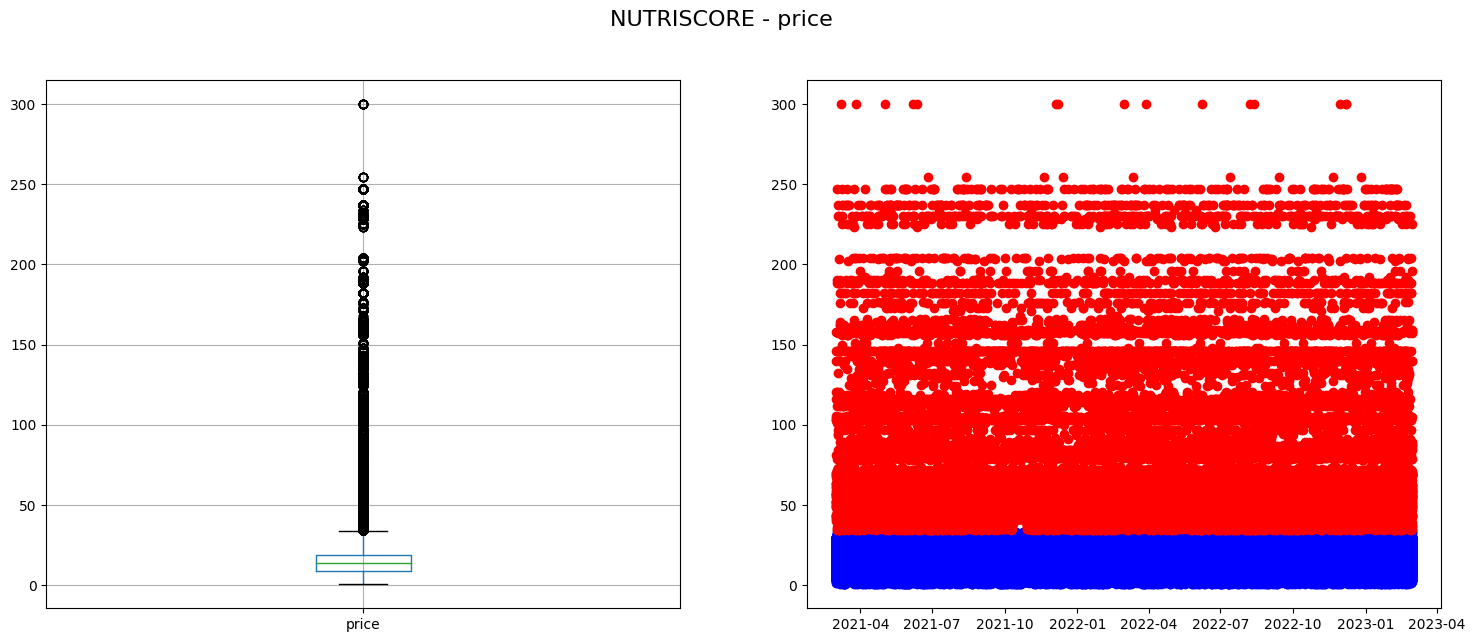

In [68]:
column_name = "price"
q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(df_global_index, column_name)
graphe_outliers(df_global_index, column_name, q_min, q_max)

Je décide de garder le livre à 300 euros pour le calcul du CA ça aurait un impact

Suite à l'analyse des données, nous avons constaté que les données sont une prédiction

# 1. Une analyse des indicateurs de vente
1. Chiffre d'affaire : indicateurs et graphiques
1. Chiffre d'affaire : évolution dans le temps
1. Chiffre d'affaire : décomposition en moyenne mobile pour évaluer la tendance globale
1. Chiffre d'affaire : par référénce :
   1. Chiffre d'affaire : par sexe
   1. Chiffre d'affaire : par Catégorie - Tops et Flops
   1. Chiffre d'affaire : par catégorie
1. Profils client
1. Chiffre d'affaire par profil client - Courbe de Lorenz


In [69]:
df_global_index.describe(include="all")

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
count,679111,679111,679111.000000,679111,679111,679111.000000,679111.000000,679111,679111,679111
unique,8600,2,NaN,342275,3265,NaN,NaN,24,3,730
top,c_1609,m,NaN,s_118668,1_369,NaN,NaN,2021-09,2022,2022-11-30
freq,25488,340826,NaN,14,2252,NaN,NaN,33314,346380,1311
mean,NaN,NaN,1977.811149,NaN,NaN,0.441953,17.454773,NaN,NaN,NaN
std,NaN,NaN,13.575361,NaN,NaN,0.595042,18.328998,NaN,NaN,NaN
min,NaN,NaN,1929.000000,NaN,NaN,0.000000,0.620000,NaN,NaN,NaN
25%,NaN,NaN,1970.000000,NaN,NaN,0.000000,8.870000,NaN,NaN,NaN
50%,NaN,NaN,1980.000000,NaN,NaN,0.000000,13.990000,NaN,NaN,NaN
75%,NaN,NaN,1987.000000,NaN,NaN,1.000000,18.990000,NaN,NaN,NaN


## 1.1 CA - Evolution du chiffre d'affaire - indicateurs et graphiques

## 1.2 CA - Evolution du chiffre d'affaire

In [70]:
df_global_index.columns

Index(['client_id', 'sex', 'birth', 'session_id', 'id_prod', 'categ', 'price',
       'month_year', 'year', 'day'],
      dtype='object')

### 1.2.1 CA : Evolution par jours

In [71]:
# Evolution du chiffre d'affaire
df_ca = df_global_index.groupby('day')['price'].agg(["sum", "mean", "std", "min", "max"])
df_ca = df_ca.rename(columns={"sum": "ca", "mean":"Prix moyen", "std":"Ecart type prix", "min":'prix min', "max":'prix max'})
df_ca.reset_index(inplace=True)
df_ca = df_ca.set_index("day")
df_ca.head()


,ca,Prix moyen,Ecart type prix,prix min,prix max
day,,,,,
2021-03-01,16565.22,17.219563,17.404549,1.68,247.22
2021-03-02,15486.45,16.492492,16.291762,1.67,189.99
2021-03-03,15198.69,16.683524,19.210489,1.99,236.99
2021-03-04,15196.07,16.828427,16.544647,2.24,202.99
2021-03-05,17471.37,18.527434,21.600945,0.62,230.04


In [72]:
maxi = df_ca["ca"].resample("M").max()
print(maxi.shape)
maxi.head()

(24,)


day
2021-03    17471.37
2021-04    17472.73
2021-05    18696.03
2021-06    18099.16
2021-07    17572.17
Freq: M, Name: ca, dtype: float64

In [73]:
mini = df_ca["ca"].resample("M").min()
print(mini.shape)
mini.head()

(24,)


day
2021-03    14324.84
2021-04    14773.48
2021-05    14235.62
2021-06    14586.31
2021-07    13792.21
Freq: M, Name: ca, dtype: float64

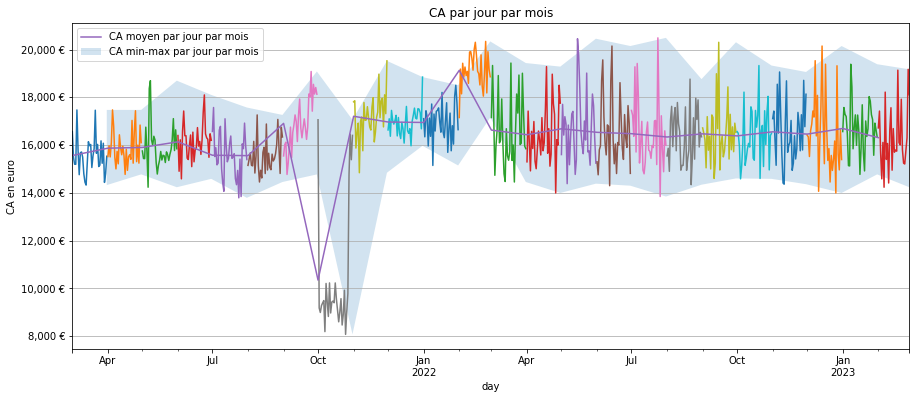

In [74]:
fig, axe = color_graph_background(1, 1)
df_ca["ca"].resample("M").plot(figsize=(15, 6), title="CA par jour par mois", label='_nolegend_')
df_ca["ca"].resample("M").mean().plot(figsize=(15, 6), label="CA moyen par jour par mois")

axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euro")
axe.grid(axis='y')
plt.fill_between(maxi.index, maxi, mini, alpha=0.2, label="CA min-max par jour par mois")
plt.legend()
plt.show()

### 1.2.2 CA : Evolution par mois

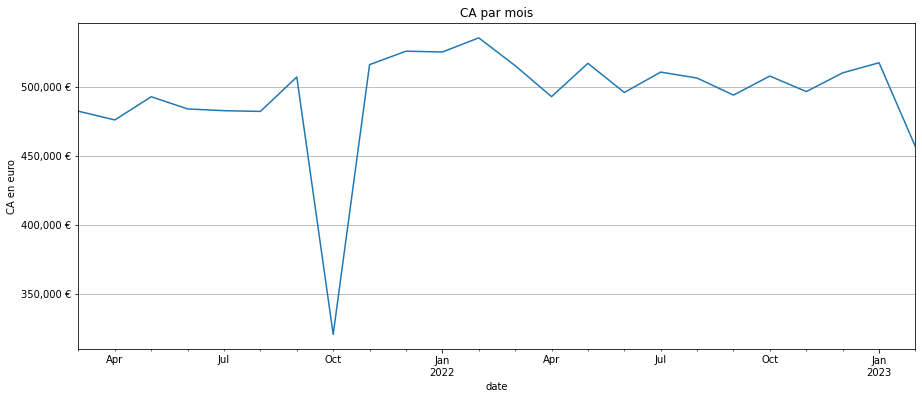

In [75]:
fig, axe = color_graph_background()
df_global_index["price"].resample("M").sum().plot(figsize=(15, 6), title="CA par mois")

axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euro")
axe.grid(axis='y')
plt.show()

In [76]:
ca_datas = df_ca.loc["2021":"2023","ca"].resample("W").agg(["mean", "std", "min", "max"])
ca_datas

,mean,std,min,max
day,,,,
2021-03-01/2021-03-07,15780.468571,938.295304,14760.20,17471.37
2021-03-08/2021-03-14,15099.034286,577.058406,14324.84,15710.51
2021-03-15/2021-03-21,16008.440000,737.267796,15060.79,17459.66
2021-03-22/2021-03-28,15634.438571,467.156889,15101.70,16176.28
2021-03-29/2021-04-04,15413.665714,598.400342,14437.04,16115.58
...,...,...,...,...
2023-01-30/2023-02-05,16212.304286,900.792211,14586.31,17423.19
2023-02-06/2023-02-12,16075.450000,1512.304685,14235.62,18217.02
2023-02-13/2023-02-19,16303.087143,1352.612575,14948.64,19135.47


### 1.2.3 CA : Zoom 2021

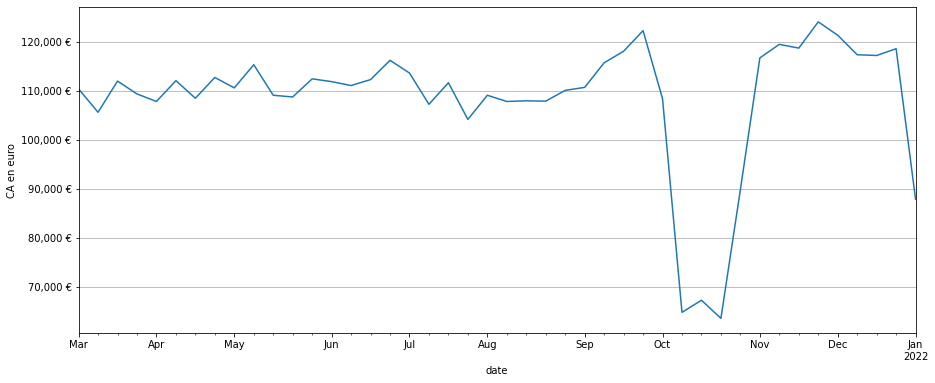

In [77]:
fig, axe = color_graph_background()
df_global_index.loc["2021"]["price"].resample("W").sum().plot(figsize=(15, 6), )
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euro")
axe.grid(axis='y')
plt.show()

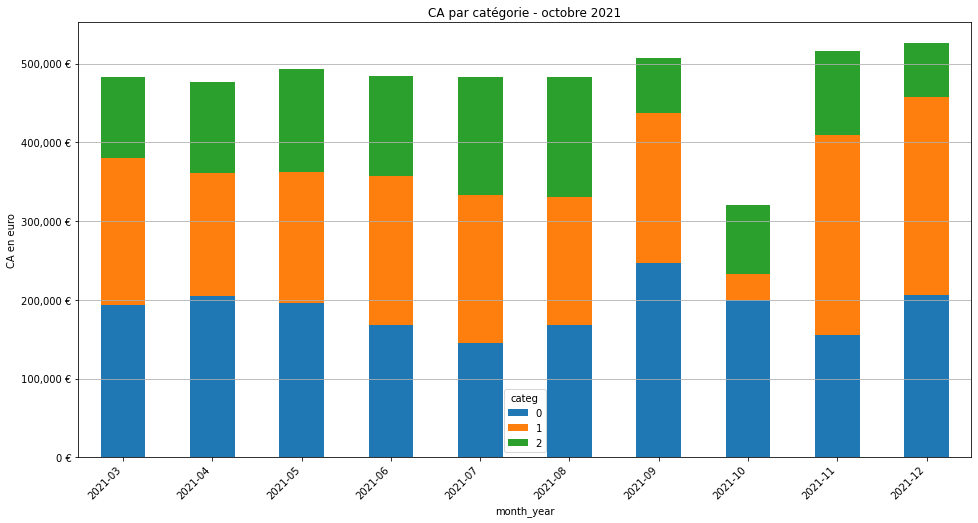

In [78]:
test5 = df_global_index.loc["2021"].groupby(['month_year', 'categ'])['price'].sum().unstack('categ').fillna(0)
figure, axe = color_graph_background()
test5.plot(kind='bar', stacked=True, title="CA par catégorie - octobre 2021", ax=axe)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euro")
axe.grid(axis='y')
figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.show()

### 1.2.4 CA : Zoom octobre 2021

C:\Program Files\Python39\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


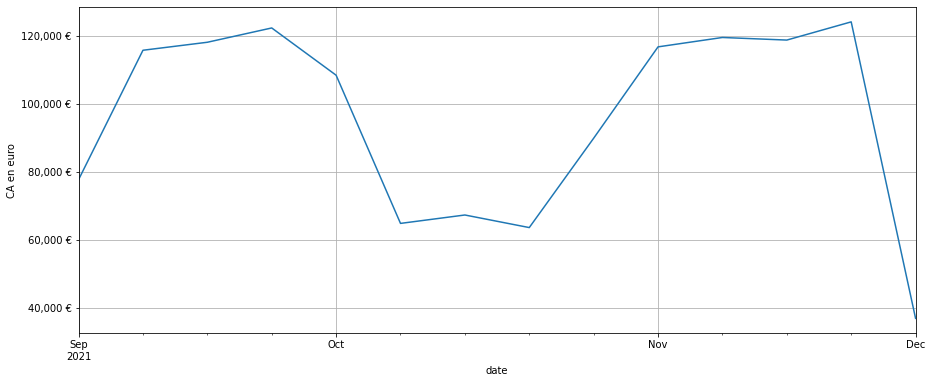

In [79]:
fig, axe = color_graph_background()
df_global_index.loc["2021-09":"2021-11","price"].resample("W").sum().plot(figsize=(15, 6), )
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euro")
axe.grid()
plt.show()

In [80]:
oct = df_global_index.loc["2021-10"]
oct.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
date,,,,,,,,,,
2021-10-28 07:35:26.214204,c_103,f,1986,s_111235,0_2192,0,16.87,2021-10,2021,2021-10-28
2021-10-23 12:41:03.390366,c_103,f,1986,s_108948,0_434,0,16.97,2021-10,2021,2021-10-23
2021-10-28 07:16:09.667580,c_103,f,1986,s_111235,0_1020,0,9.71,2021-10,2021,2021-10-28
2021-10-06 18:34:39.902464,c_103,f,1986,s_100965,0_1453,0,7.99,2021-10,2021,2021-10-06
2021-10-19 22:45:29.086913,c_103,f,1986,s_107276,0_1403,0,15.99,2021-10,2021,2021-10-19


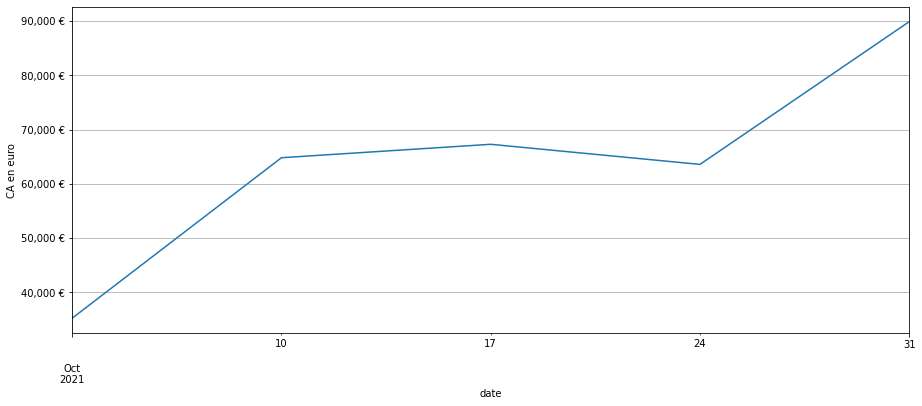

In [81]:
fig, axe = color_graph_background()
oct["price"].resample("W").sum().plot(figsize=(15, 6), )
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.grid()
axe.set_ylabel("CA en euro")
plt.show()

In [82]:
oct["categ"].value_counts()

0    18762
1     1666
2     1171
Name: categ, dtype: int64

In [83]:
df_octobre = oct.groupby(['categ'])['price'].agg(['sum','mean','count'])
df_octobre = df_octobre.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres vendus"})
df_octobre

,ca,prix moyen,nb livres vendus
categ,,,
0,199250.83,10.619914,18762
1,33762.32,20.265498,1666
2,87785.59,74.966345,1171


In [84]:
df_categ_info = df_global_index.copy()
df_categ_info = df_categ_info.groupby(['categ'])['price'].agg(['sum','mean','count'])
df_categ_info = df_categ_info.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres vendus"})
df_categ_info

,ca,prix moyen,nb livres vendus
categ,,,
0,4419730.97,10.638188,415459
1,4653722.69,20.485730,227169
2,2780275.02,76.207412,36483


In [85]:
nb_livre_categ_by_day = oct.groupby(['day', 'categ'])['price'].count().unstack('categ').fillna(0)
ca_categ_by_day = oct.groupby(['day', 'categ'])['price'].sum().unstack('categ').fillna(0)
ca_categ_by_day.head()

categ,0,1,2
day,,,
2021-10-01,6950.50,7003.79,3104.05
2021-10-02,7141.01,0.00,2041.12
2021-10-03,6786.57,0.00,2206.48
2021-10-04,6533.60,0.00,2746.08
2021-10-05,6357.91,0.00,3032.55


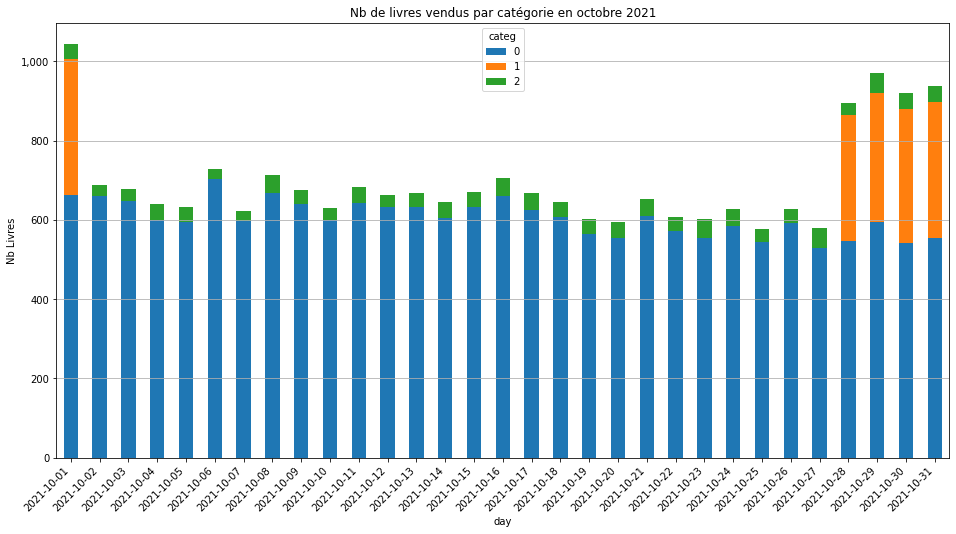

In [86]:
figure, axe = color_graph_background()
nb_livre_categ_by_day.plot(kind='bar', stacked=True, title="Nb de livres vendus par catégorie en octobre 2021", ax=axe)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
axe.set_ylabel("Nb Livres")
axe.grid(axis='y')
figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.show()

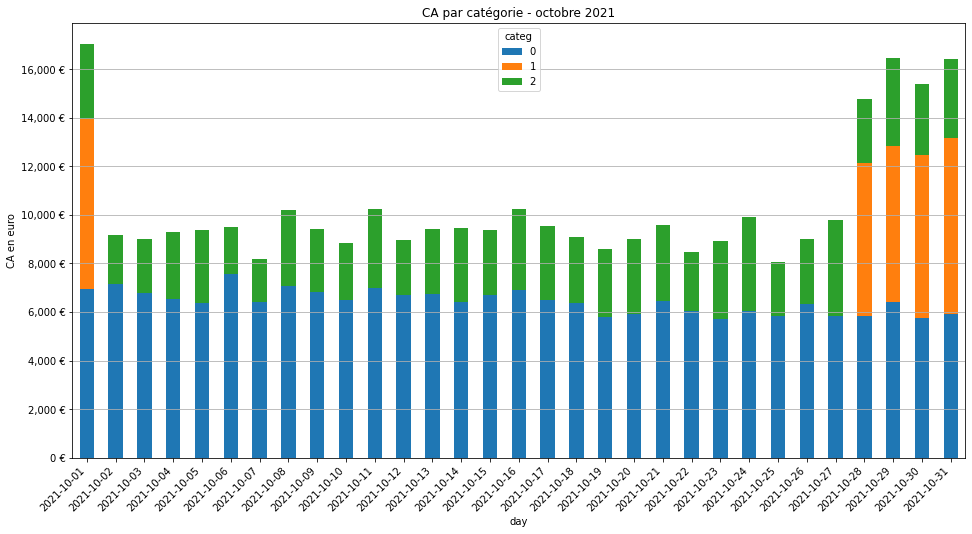

In [87]:
figure, axe = color_graph_background()
ca_categ_by_day.plot(kind='bar', stacked=True, title="CA par catégorie - octobre 2021", ax=axe)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euro")
axe.grid(axis='y')
figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.show()

In [88]:
data4=oct.reset_index()
data4.dtypes

date          datetime64[ns]
client_id             object
sex                 category
birth                  int64
session_id            object
id_prod               object
categ                  int32
price                float64
month_year         period[M]
year           period[A-DEC]
day                period[D]
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

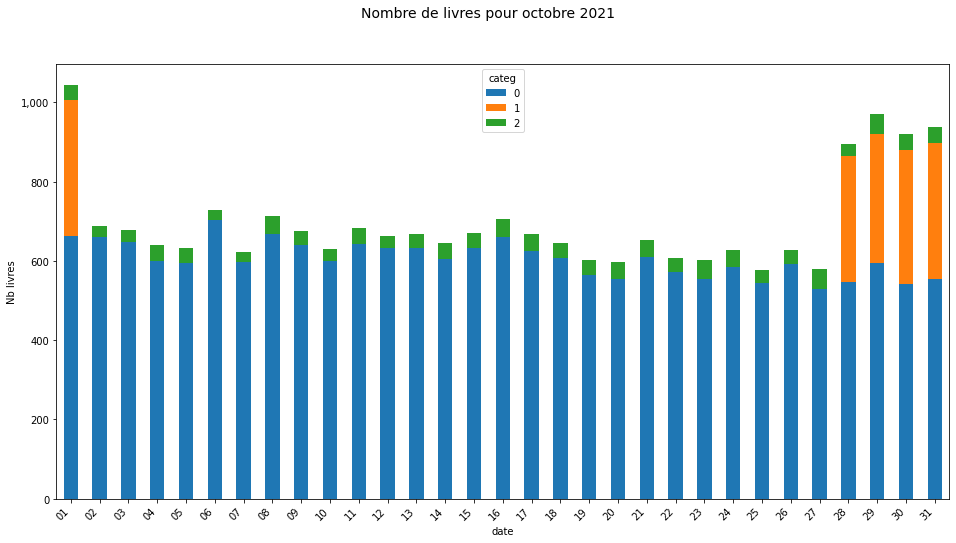

In [89]:
plot_df = data4.groupby([pd.Grouper(key='date', freq='d'), 'categ']).size().unstack(fill_value=0)
figure, axe = color_graph_background()
plot_df.plot(kind='bar', stacked=True, ax=axe)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
axe.set_ylabel("Nb livres")
axe.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
figure.suptitle('Nombre de livres pour octobre 2021', fontsize=14)

plt.show

In [90]:
data4=oct.reset_index()
data4.columns

Index(['date', 'client_id', 'sex', 'birth', 'session_id', 'id_prod', 'categ',
       'price', 'month_year', 'year', 'day'],
      dtype='object')

In [91]:
data4['categ'].unique()

array([0, 1, 2])

In [92]:
data4 = data4[['date', 'categ', 'price']]

<function matplotlib.pyplot.show(close=None, block=None)>

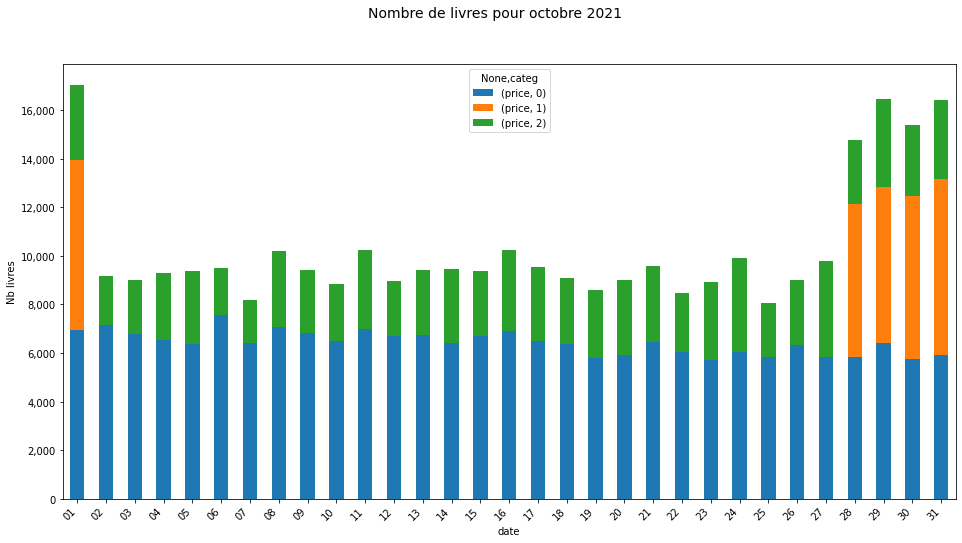

In [93]:
plot_df = data4.groupby([pd.Grouper(key='date', freq='d'), 'categ']).sum().unstack(fill_value=0)
figure, axe = color_graph_background()
plot_df.plot(kind='bar', stacked=True, ax=axe)
plt.xticks(rotation=45, ha="right")
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
axe.set_ylabel("Nb livres")
axe.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

figure.set_size_inches(16, 8, forward=True)
figure.suptitle('Nombre de livres pour octobre 2021', fontsize=14)
plt.show

Vu les données manquantes en octobre, on vérifie si les données étaient présentes dans le fichier chargé et qu'il s'agit des traitements de nettoyage ou si les données sont manquantes dès le départ

In [94]:
print(df_transactions_clean.shape)
df_transactions_clean.dtypes

(679332, 4)


id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [95]:
df_transactions_control = df_transactions_clean.copy()

In [96]:
df_transactions_control["date"] = pd.to_datetime(df_transactions_control["date"])
df_transactions_control['day'] = pd.to_datetime(df_transactions_control["date"]).dt.to_period('D')
df_transactions_control.head()

,id_prod,date,session_id,client_id,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11


In [97]:
df_transactions_control = df_transactions_control.set_index("date")
df_transactions_control.head()

,id_prod,session_id,client_id,day
date,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,2022-05-20
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,2022-02-02
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,2022-06-18
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,2021-06-24
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,2023-01-11


In [98]:
print(df_transactions_control.loc["2021-10"].shape)
df_transactions_control.loc["2021-10"]

(21606, 4)


,id_prod,session_id,client_id,day
date,,,,
2021-10-02 17:39:26.919537,0_1409,s_99013,c_5725,2021-10-02
2021-10-03 16:05:12.544172,0_1247,s_99443,c_3394,2021-10-03
2021-10-13 14:35:01.163737,0_1272,s_104207,c_8534,2021-10-13
2021-10-24 13:25:39.888945,0_1102,s_109442,c_1609,2021-10-24
2021-10-05 21:57:27.673800,0_1079,s_100557,c_7918,2021-10-05
...,...,...,...,...
2021-10-22 01:12:51.848429,0_1418,s_108264,c_7213,2021-10-22
2021-10-26 04:40:29.252116,0_1391,s_110243,c_7878,2021-10-26
2021-10-15 16:58:58.818380,0_1609,s_105230,c_6714,2021-10-15


In [99]:
df_transactions_control_group = df_transactions_control.groupby(['day', 'id_prod']).agg(['count'])
df_transactions_control_group = df_transactions_control_group.rename(columns={"count": "nb_livres"})
df_transactions_control_group.reset_index(inplace=True)
print(df_transactions_control_group.shape)
df_transactions_control_group.head(10)

(449015, 4)


,day,id_prod,session_id,client_id
,,,nb_livres,nb_livres
0,2021-03-01,0_0,1,1
1,2021-03-01,0_1,1,1
2,2021-03-01,0_1000,1,1
3,2021-03-01,0_1003,1,1
4,2021-03-01,0_1007,1,1
5,2021-03-01,0_1008,1,1
6,2021-03-01,0_1009,2,2
7,2021-03-01,0_1013,1,1
8,2021-03-01,0_1015,1,1


In [100]:
octo =  df_transactions_control_group.loc[(df_transactions_control_group["day"] > "2021-09") & (df_transactions_control_group["day"] < "2021-11")]
print(octo.shape)
octo.head()

(35292, 4)


,day,id_prod,session_id,client_id
,,,nb_livres,nb_livres
111396,2021-09-02,0_0,1,1
111397,2021-09-02,0_1000,1,1
111398,2021-09-02,0_1001,1,1
111399,2021-09-02,0_1003,1,1
111400,2021-09-02,0_1009,1,1


Les données manquaient dans le fichier d'origine.    

Il manque les données pour la catégorie 1 du 02/10 au 27/10/2021.    
Pour homogénéiser les données, il faut :
* soit supprimer le mois d'octobre de toutes les années et travailler sur 11 mois
* soit appliquer la moyenne pour les données manquantes de 2021

In [101]:
oct_22 = df_global_index.loc["2022-10"]
oct_22.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day
date,,,,,,,,,,
2022-10-19 07:32:23.140487,c_103,f,1986,s_284714,0_1636,0,9.45,2022-10,2022,2022-10-19
2022-10-26 16:34:41.740599,c_103,f,1986,s_288362,0_1429,0,7.99,2022-10,2022,2022-10-26
2022-10-26 16:14:13.732205,c_103,f,1986,s_288362,0_1219,0,3.99,2022-10,2022,2022-10-26
2022-10-26 16:16:27.156530,c_103,f,1986,s_288362,0_1481,0,3.99,2022-10,2022,2022-10-26
2022-10-31 21:49:19.635328,c_103,f,1986,s_290822,0_1512,0,5.29,2022-10,2022,2022-10-31


In [102]:
df_global_index.index.min()

Timestamp('2021-03-01 00:01:07.843138')

In [103]:
df_global_index.index.max()

Timestamp('2023-02-28 23:58:30.792755')

Il n'y a que 2022 avec un mois d'octobre, de fait je supprime le mois d'octobre pour 2021 et 2022

In [104]:
df_global_index_less_10 = df_global_index[df_global_index["month_year"] != "2022-10"]
print("Before : ", df_global_index.shape,"> After :", df_global_index_less_10.shape)

Before :  (679111, 10) > After : (650147, 10)


In [105]:
df_global_index_less_10 = df_global_index_less_10[df_global_index_less_10["month_year"] != "2021-10"]
print("Before : ", df_global_index.shape,"> After :", df_global_index_less_10.shape)

Before :  (679111, 10) > After : (628548, 10)


In [106]:
ca_less_10 = df_global_index_less_10.groupby('day')['price'].agg(["sum", "mean", "std", "min", "max"])
ca_less_10 = ca_less_10.rename(columns={"sum": "ca", "mean":"Prix moyen", "std":"Ecart type prix", "min":'prix min', "max":'prix max'})
ca_less_10.reset_index(inplace=True)
ca_less_10 = ca_less_10.set_index("day")
print(ca_less_10.shape)
ca_less_10.head()

(668, 5)


,ca,Prix moyen,Ecart type prix,prix min,prix max
day,,,,,
2021-03-01,16565.22,17.219563,17.404549,1.68,247.22
2021-03-02,15486.45,16.492492,16.291762,1.67,189.99
2021-03-03,15198.69,16.683524,19.210489,1.99,236.99
2021-03-04,15196.07,16.828427,16.544647,2.24,202.99
2021-03-05,17471.37,18.527434,21.600945,0.62,230.04


In [107]:
mini_less_10 = ca_less_10["ca"].resample("Y").min()
maxi_less_10 = ca_less_10["ca"].resample("Y").max()
print("Mini:",mini.shape, "Maxi:", maxi.shape)

Mini: (24,) Maxi: (24,)


Le fait d'avoir supprimé le mois d'octobre, pose problème pour la représentation mensuelle.

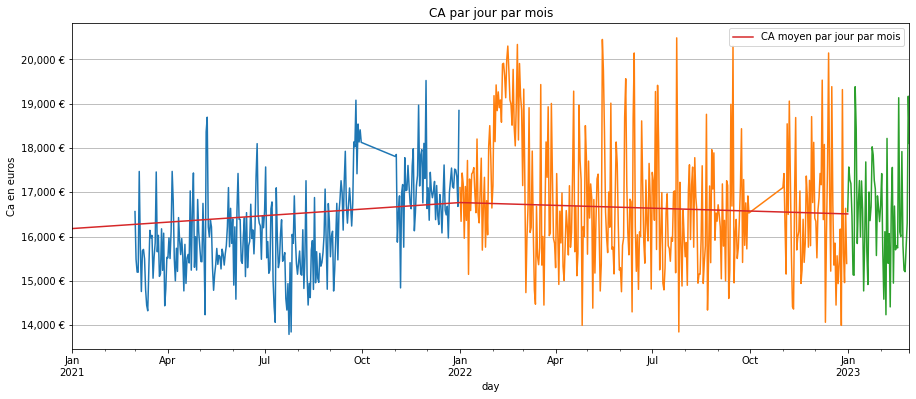

In [108]:
fig, axe = color_graph_background(1, 1)
ca_less_10["ca"].resample("Y").plot(figsize=(15, 6), title="CA par jour par mois", label='_nolegend_')
ca_less_10["ca"].resample("Y").mean().plot(figsize=(15, 6), label="CA moyen par jour par mois")
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("Ca en euros")
axe.grid(axis='y')
plt.legend()
plt.show()

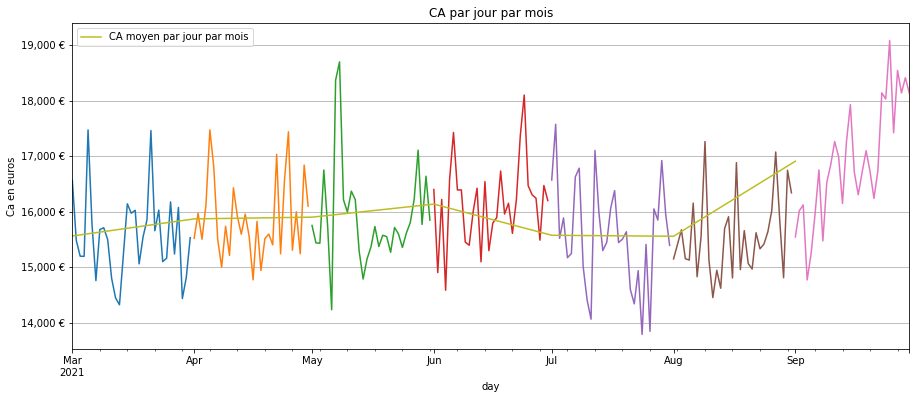

In [109]:
fig, axe = color_graph_background(1, 1)
try:
    ca_less_10["ca"].resample("M").plot(figsize=(15, 6), title="CA par jour par mois", label='_nolegend_')
except:
    pass
try:
    ca_less_10["ca"].resample("M").mean().plot(figsize=(15, 6), label="CA moyen par jour par mois")
except:
    pass
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("Ca en euros")
axe.grid(axis='y')
plt.legend()
plt.show()

In [110]:
ca_less_10.head()

,ca,Prix moyen,Ecart type prix,prix min,prix max
day,,,,,
2021-03-01,16565.22,17.219563,17.404549,1.68,247.22
2021-03-02,15486.45,16.492492,16.291762,1.67,189.99
2021-03-03,15198.69,16.683524,19.210489,1.99,236.99
2021-03-04,15196.07,16.828427,16.544647,2.24,202.99
2021-03-05,17471.37,18.527434,21.600945,0.62,230.04


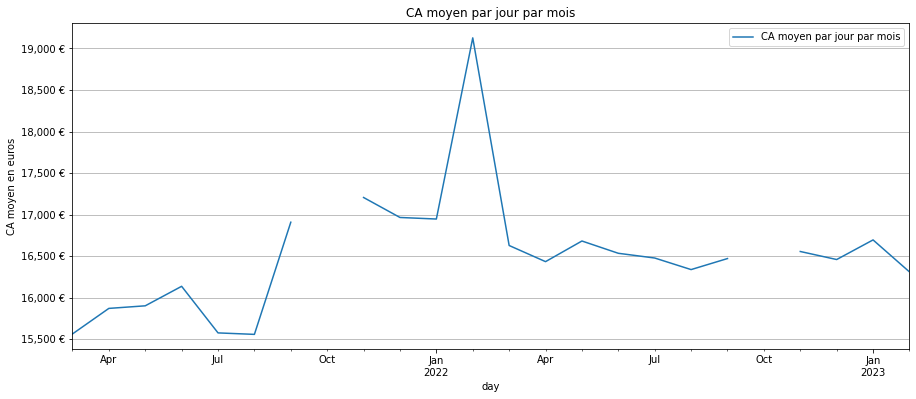

In [111]:
fig, axe = color_graph_background(1, 1)
try:
    ca_less_10["ca"].resample("M").mean().plot(figsize=(15, 6), title="CA moyen par jour par mois", label="CA moyen par jour par mois")
except:
    pass
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA moyen en euros")
axe.grid(axis='y')
plt.legend()
plt.show()

### 1.2.5 CA : Moyenne par mois

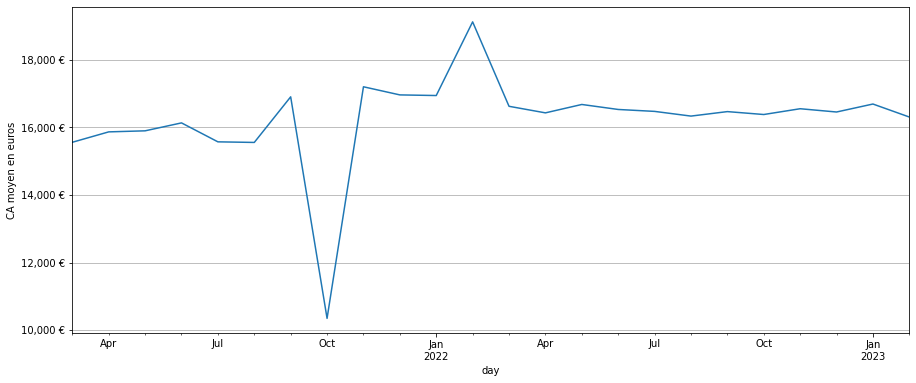

In [112]:
fig, axe = color_graph_background()
df_ca["ca"].resample("M").mean().plot(figsize=(15, 6))
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA moyen en euros")
axe.grid(axis='y')
plt.show()

### 1.2.6 CA : Ecart type

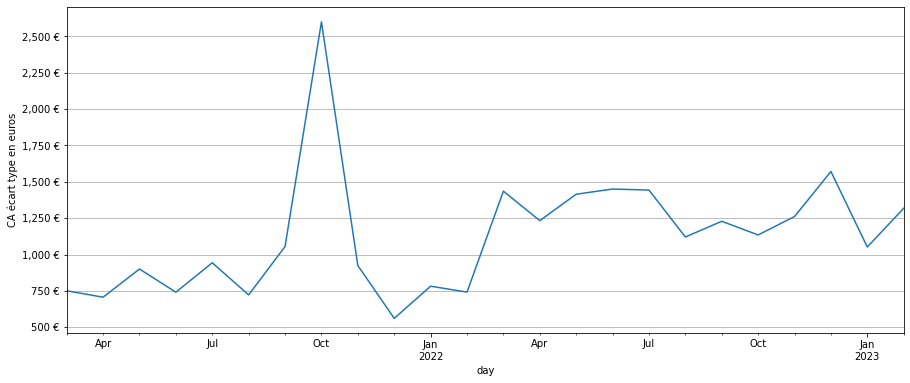

In [113]:
fig, axe = color_graph_background()
df_ca["ca"].resample("M").std().plot(figsize=(15, 6))
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA écart type en euros")
axe.grid(axis='y')
plt.show()

### 1.2.7 CA : Moyenne par mois et par semaine

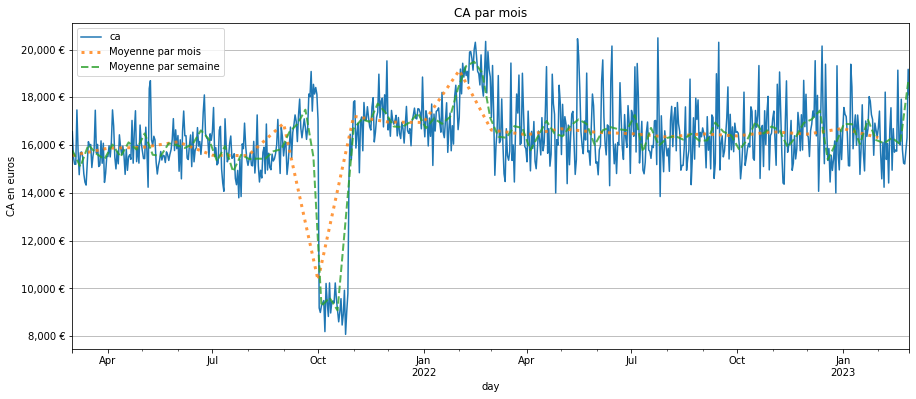

In [114]:
fig, axe = color_graph_background()
fig.set_size_inches(15, 6, forward=True)
df_ca["ca"].plot(title="CA par mois")
df_ca["ca"].resample("M").mean().plot(label="Moyenne par mois", lw=3, ls=":", alpha=0.8)
df_ca["ca"].resample("W").mean().plot(label="Moyenne par semaine", lw=2, ls="--", alpha=0.8)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.grid(axis='y')
axe.set_ylabel("CA en euros")
plt.legend()
plt.show()

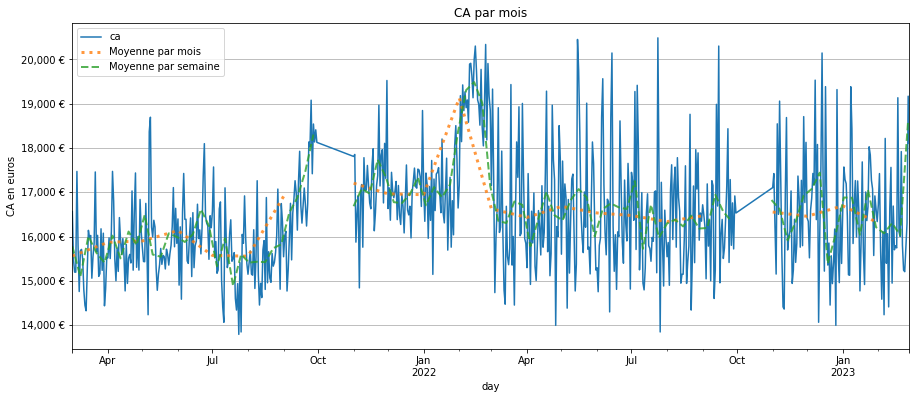

In [115]:
fig, axe = color_graph_background()
fig.set_size_inches(15, 6, forward=True)
ca_less_10["ca"].plot(title="CA par mois")
ca_less_10["ca"].resample("M").mean().plot(label="Moyenne par mois", lw=3, ls=":", alpha=0.8)
ca_less_10["ca"].resample("W").mean().plot(label="Moyenne par semaine", lw=2, ls="--", alpha=0.8)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euros")
axe.grid(axis='y')
plt.legend()
plt.show()

### 1.2.8 CA : comparaison des mois par années

In [116]:
df_ca.head()

,ca,Prix moyen,Ecart type prix,prix min,prix max
day,,,,,
2021-03-01,16565.22,17.219563,17.404549,1.68,247.22
2021-03-02,15486.45,16.492492,16.291762,1.67,189.99
2021-03-03,15198.69,16.683524,19.210489,1.99,236.99
2021-03-04,15196.07,16.828427,16.544647,2.24,202.99
2021-03-05,17471.37,18.527434,21.600945,0.62,230.04


In [117]:
def get_year_ca_by_month(df_ca, year='2021'):
    d1=df_ca.loc[year, 'ca'].resample('M').sum().reset_index()
    d1["month"] = d1["day"].dt.strftime('%m')
    d1 = d1.drop("day", axis=1)
    d1 = d1.rename(columns={"ca":year})
    d1 = d1.set_index("month")
    return d1

In [118]:
d1 = get_year_ca_by_month(df_ca, year="2021")
d1.head()

,2021
month,
03,482440.61
04,476109.30
05,492943.47
06,484088.56
07,482835.40


In [119]:
d2 = get_year_ca_by_month(df_ca, year="2022")
d2.head()

,2022
month,
01,525338.99
02,535571.50
03,515456.53
04,492998.94
05,517132.60


In [120]:
d3 = get_year_ca_by_month(df_ca, year="2023")
d3.head()

,2023
month,
01,517540.55
02,456679.76


In [121]:
result = pd.concat([d1, d2, d3], axis=1)
result = result.sort_index()
result

,2021,2022,2023
month,,,
01,NaN,525338.99,517540.55
02,NaN,535571.50,456679.76
03,482440.61,515456.53,NaN
04,476109.30,492998.94,NaN
05,492943.47,517132.60,NaN
06,484088.56,496016.12,NaN
07,482835.40,510783.12,NaN
08,482284.79,506467.27,NaN
09,507240.68,494114.53,NaN


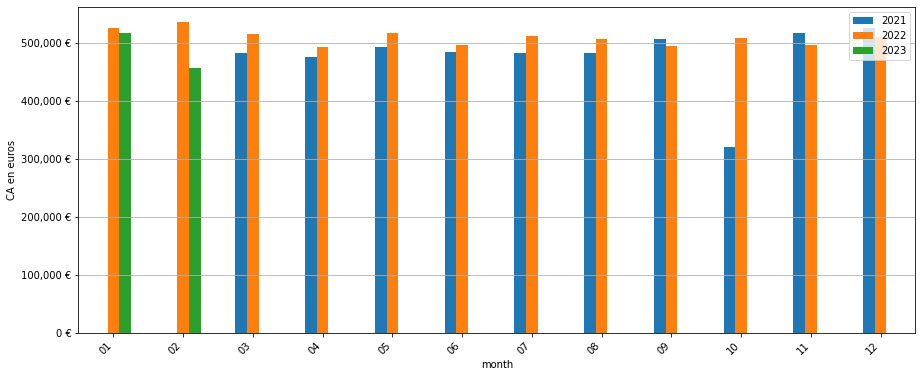

In [122]:
fig, ax = color_graph_background()
fig.set_size_inches(15, 6, forward=True)
result.plot(kind="bar", ax=ax)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
ax.grid(axis='y')
ax.set_ylabel("CA en euros")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

In [123]:
result["evolution-22/21"] = ((result["2022"]*100)/result["2021"])-100
result["evolution-23/22"] = ((result["2023"]*100)/result["2022"])-100
result

,2021,2022,2023,evolution-22/21,evolution-23/22
month,,,,,
01,NaN,525338.99,517540.55,NaN,-1.484459
02,NaN,535571.50,456679.76,NaN,-14.730384
03,482440.61,515456.53,NaN,6.843520,NaN
04,476109.30,492998.94,NaN,3.547429,NaN
05,492943.47,517132.60,NaN,4.907080,NaN
06,484088.56,496016.12,NaN,2.463921,NaN
07,482835.40,510783.12,NaN,5.788250,NaN
08,482284.79,506467.27,NaN,5.014149,NaN
09,507240.68,494114.53,NaN,-2.587756,NaN


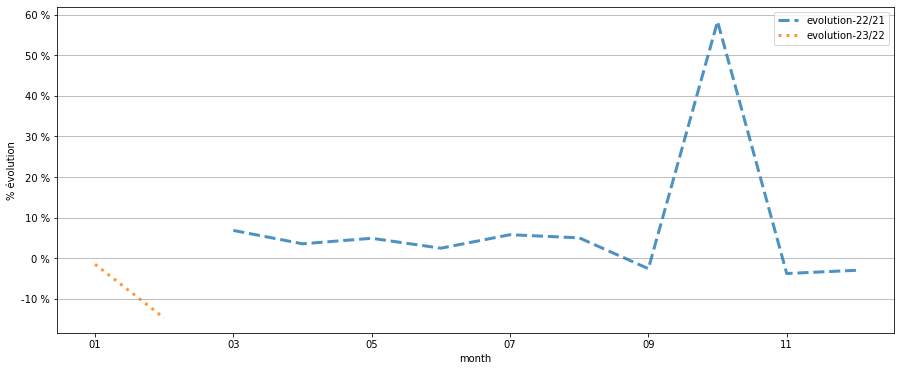

In [124]:
fig, axe = color_graph_background()
fig.set_size_inches(15, 6, forward=True)
result["evolution-22/21"].plot(label="evolution-22/21", lw=3, ls="--", alpha=0.8)
result["evolution-23/22"].plot(label="evolution-23/22", lw=3, ls=":", alpha=0.8)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} %". format(x)))
axe.grid(axis='y')
axe.set_ylabel("% évolution")
plt.legend()
plt.show()

## 1.3 CA : décomposition en moyenne mobile pour évaluer la tendance globale

### 1.3.1 CA : Moyenne mobile 2021

In [125]:
def draw_1(df_ca, ax, title):
    df_ca.loc["2021","ca"].plot(title=title, ax=ax)
    df_ca.loc["2021","ca"].resample("M").mean().plot(label="Moyenne par mois", lw=3, ls=":", alpha=0.8, ax=ax)
    df_ca.loc["2021","ca"].resample("W").mean().plot(label="Moyenne par semaine", lw=2, ls="--", alpha=0.8, ax=ax)
    df_ca.loc["2021","ca"].rolling(window=7, center=True).mean().plot(label="Moyenne mobile", lw=3, ls="-.", alpha=0.8, ax=ax)
    df_ca.loc["2021","ca"].ewm(alpha=0.6).mean().plot(label="EWM", lw=3, ls="--", alpha=0.8, ax=ax)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
    ax.set_ylabel("CA en euros")
    ax.grid(axis='y')
    ax.legend()

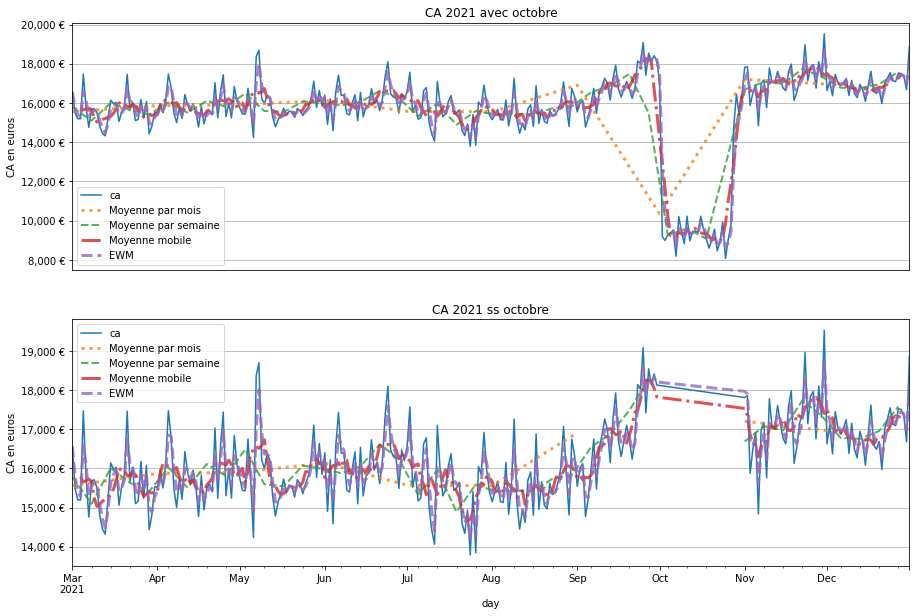

In [126]:
fig, axes = color_graph_background(2,1)
fig.set_size_inches(15, 10, forward=True)

draw_1(df_ca, axes[0],"CA 2021 avec octobre")
axes[0].xaxis.set_visible(False)

draw_1(ca_less_10, axes[1],"CA 2021 ss octobre")

plt.show()

### 1.3.2 CA : EWM 2021

In [127]:
def draw_2(df_ca, axe, title):
    df_ca.loc["2021","ca"].plot(title=title, ax=axe)
    # EWM = exponential weigthed function
    for i in np.arange(0.2, 1, 0.2):
        df_ca.loc["2021","ca"].ewm(alpha=i).mean().plot(label="EWM {:.1f}".format(i), lw=2, ls="--", alpha=0.8, ax=axe)
    axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
    axe.set_ylabel("CA en euros")
    axe.grid(axis='y')
    axe.legend()

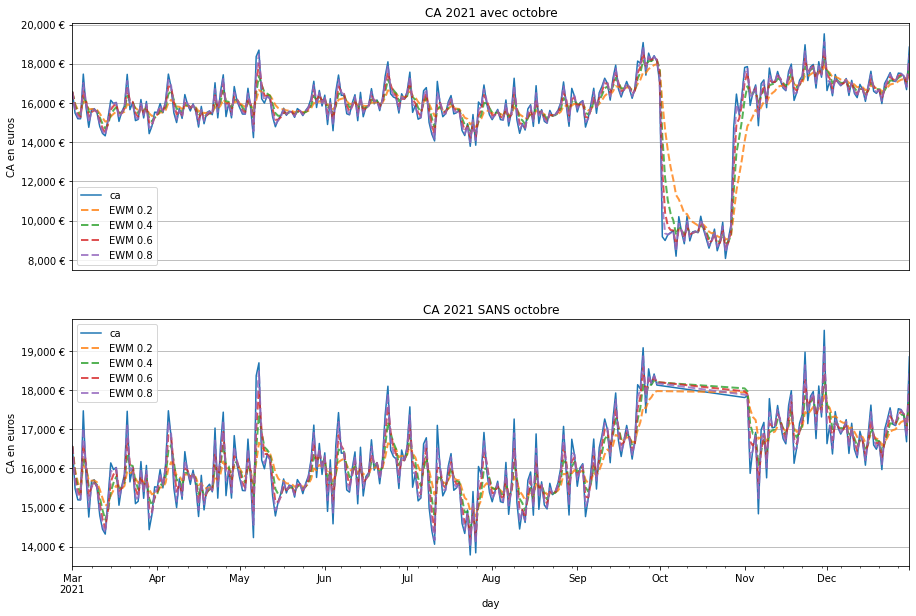

In [128]:
fig, axes = color_graph_background(2,1)
fig.set_size_inches(15, 10, forward=True)

draw_2(df_ca, axes[0], "CA 2021 avec octobre")
axes[0].xaxis.set_visible(False)

draw_2(ca_less_10, axes[1], "CA 2021 SANS octobre")

plt.show()

### 1.3.2 CA : moyen par semaine sur 2021

In [129]:
def draw_3(df, axe, title):
    ca_datas = df.loc["2021","ca"].resample("W").agg(["mean", "std", "min", "max"])
    ca_datas["mean"]["2021"].plot(label="moyenne par semaine", title=title, ax=axe)
    axe.fill_between(ca_datas.index, ca_datas["max"], ca_datas["min"], alpha=0.2, label="min-max par semaine")
    axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
    axe.set_ylabel("CA en euros")
    axe.grid(axis='y')
    axe.legend()

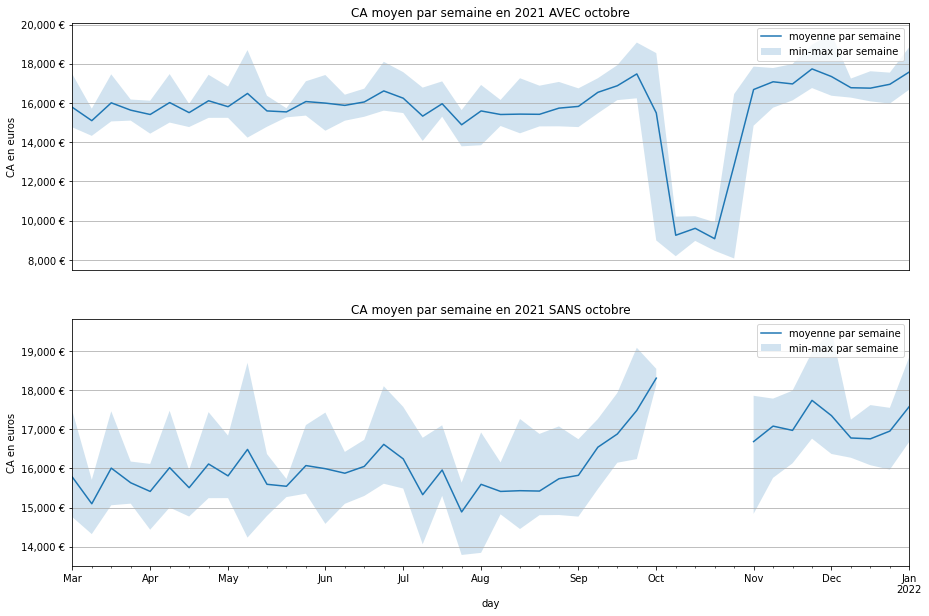

In [130]:
fig, axes = color_graph_background(2,1)
fig.set_size_inches(15, 10, forward=True)

draw_3(df_ca, axes[0], "CA moyen par semaine en 2021 AVEC octobre")
axes[0].xaxis.set_visible(False)
draw_3(ca_less_10, axes[1], "CA moyen par semaine en 2021 SANS octobre")

plt.show()

## 1.4. CA : par référénce :
   1. Chiffre d'affaire : par sexe
   1. Chiffre d'affaire : par Catégorie - Tops et Flops
   1. Chiffre d'affaire : par catégorie

### 1.4.0. Lien entre 2 variables : représentation de pearson

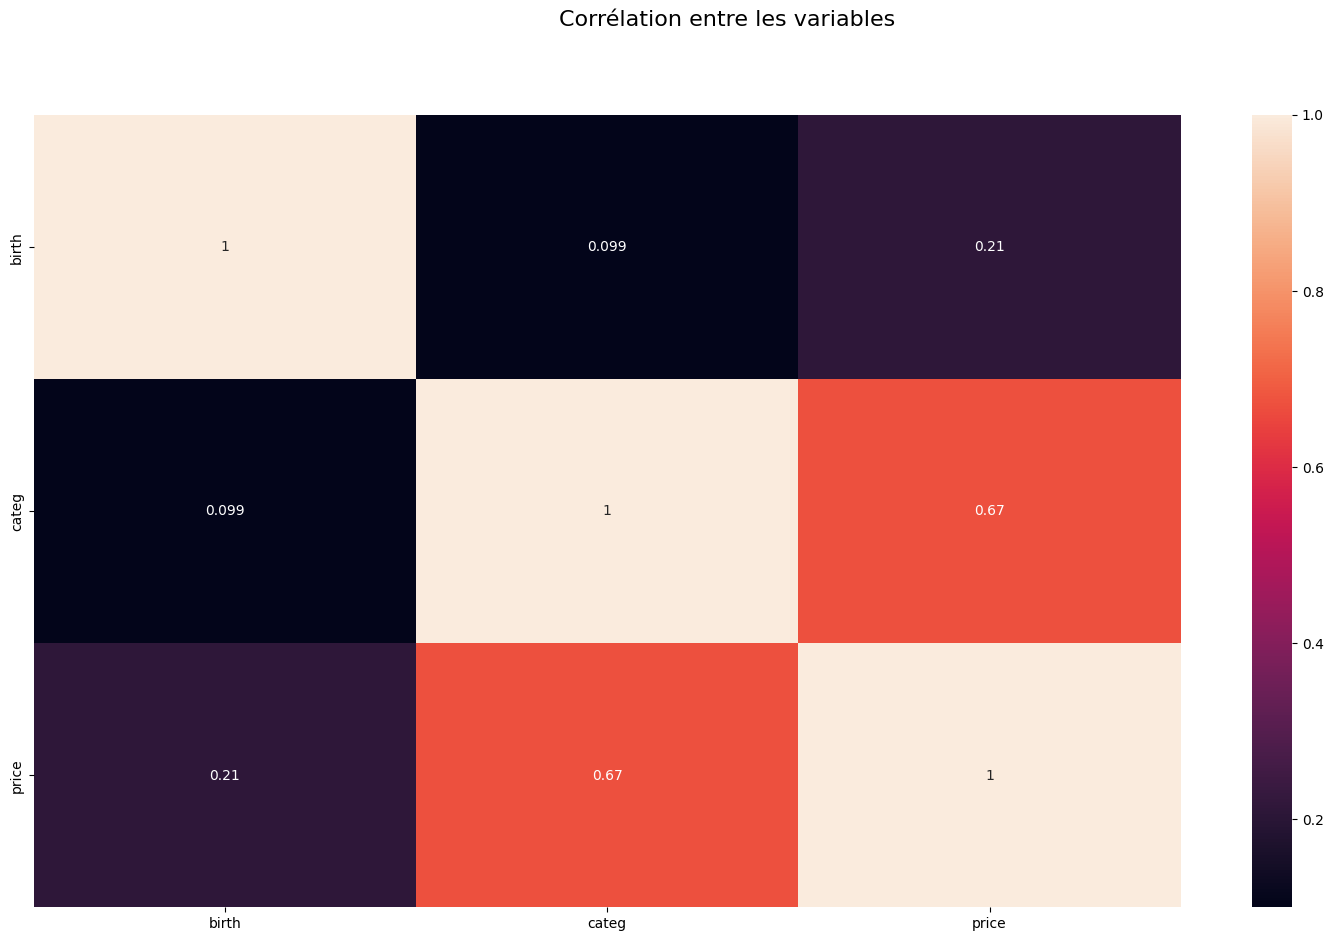

In [131]:
draw_correlation_graphe(df_global_index, "Corrélation entre les variables", verbose)

Il y a un lien entre les catégories et les prix

### 1.4.1. Catégories / prix

In [132]:
corr, _ = pearsonr(df_global_index['price'], df_global_index['categ']) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.672


Il y a trop de prix différents pour avoir une représentation.
L'ajout d'une catégorie de prix devrait permettre d'avoir une meilleure vision.

In [133]:
sorter_prix = create_sorter_prix()
sorter_prix

['< 10 €',
 'de 10 à 25 €',
 'de 25 à 50 €',
 'de 50 à 75 €',
 'de 75 à 100 €',
 'de 100 à 150 €',
 'de 150 à 200 €',
 'de 200 à 250 €',
 'de 250 à 300 €',
 '>= 300 €']

In [134]:
df_global_index['tranche_prix'] = df_global_index['price'].map(category_prix)
df_global_index.tail()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix
date,,,,,,,,,,,
2021-07-23 07:01:38.963669,c_4391,f,2001,s_65994,2_147,2,181.99,2021-07,2021,2021-07-23,de 150 à 200 €
2022-03-25 18:07:25.880052,c_1232,f,1960,s_184472,0_142,0,19.85,2022-03,2022,2022-03-25,de 10 à 25 €
2021-09-25 18:07:25.880052,c_1232,f,1960,s_95415,0_142,0,19.85,2021-09,2021,2021-09-25,de 10 à 25 €
2021-03-11 00:11:32.016264,c_7534,m,1992,s_4605,2_205,2,100.99,2021-03,2021,2021-03-11,de 100 à 150 €
2022-07-11 00:11:32.016264,c_7534,m,1992,s_236636,2_205,2,100.99,2022-07,2022,2022-07-11,de 100 à 150 €


In [135]:
df_global_index_sort_tranche_prix = df_global_index.copy()
df_global_index_sort_tranche_prix['tranche_prix'] = df_global_index_sort_tranche_prix['tranche_prix'].astype("category")
df_global_index_sort_tranche_prix['tranche_prix'] = df_global_index_sort_tranche_prix['tranche_prix'].cat.set_categories(sorter_prix)
df_global_index_sort_tranche_prix = df_global_index_sort_tranche_prix.sort_values('tranche_prix')
df_global_index_sort_tranche_prix

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20,< 10 €
2022-10-23 22:10:08.444278,c_4432,f,1980,s_287062,0_1021,0,8.99,2022-10,2022,2022-10-23,< 10 €
2022-01-23 22:10:08.444278,c_4432,f,1980,s_154230,0_1021,0,8.99,2022-01,2022,2022-01-23,< 10 €
2023-01-23 22:10:08.444278,c_4432,f,1980,s_331338,0_1021,0,8.99,2023-01,2023,2023-01-23,< 10 €
2022-11-22 23:36:02.827708,c_4432,f,1980,s_301360,0_1627,0,3.99,2022-11,2022,2022-11-22,< 10 €
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-04 15:45:14.708313,c_4958,m,1999,s_129351,2_2,2,300.00,2021-12,2021,2021-12-04,>= 300 €
2021-03-26 04:33:19.697459,c_4958,m,1999,s_11582,2_2,2,300.00,2021-03,2021,2021-03-26,>= 300 €
2021-03-07 14:07:31.004391,c_1001,m,1982,s_3041,2_2,2,300.00,2021-03,2021,2021-03-07,>= 300 €


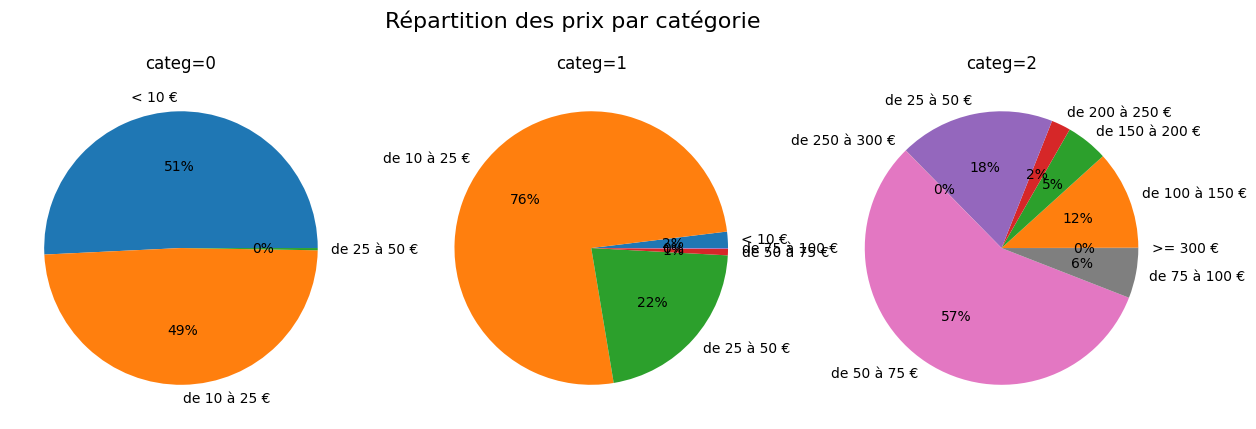

draw_pie_multiple_by_value categ  ................................................. END


In [136]:
df_global_index_sort_tranche_prix_temp = df_global_index_sort_tranche_prix.copy()
df_global_index_sort_tranche_prix_temp['tranche_prix'] = df_global_index_sort_tranche_prix_temp['tranche_prix'].astype("object")
draw_pie_multiple_by_value(df_global_index_sort_tranche_prix_temp,'categ', df_global_index_sort_tranche_prix_temp['categ'].unique(), 'tranche_prix', "Répartition des prix par catégorie", legend=False, verbose=verbose)

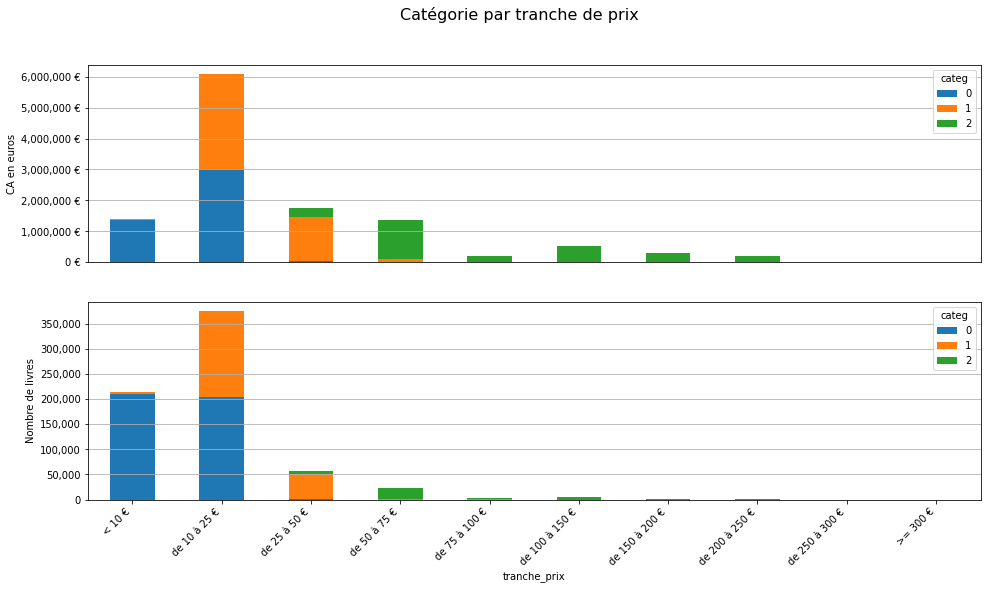

In [137]:
draw_bar_tranches(df_global_index_sort_tranche_prix, ['tranche_prix', 'categ'], sum_col='price', count_col='categ', unstack_col='categ', suptitle="Catégorie par tranche de prix")

Autre façon de faire

In [138]:
price=df_global_index_sort_tranche_prix['price']

bins = pd.IntervalIndex.from_tuples([(-1, 9), (9, 24), (24, 49), (49, 74), (74, 99), (99, 149), (149, 199), (199, 249), (249, 299), (299, 400)])
d_price = pd.cut(price, bins).value_counts().sort_index()
d_price

(-1, 9]       186375
(9, 24]       389261
(24, 49]       70192
(49, 74]       23961
(74, 99]        2374
(99, 149]       4274
(149, 199]      1817
(199, 249]       833
(249, 299]         9
(299, 400]        15
Name: price, dtype: int64

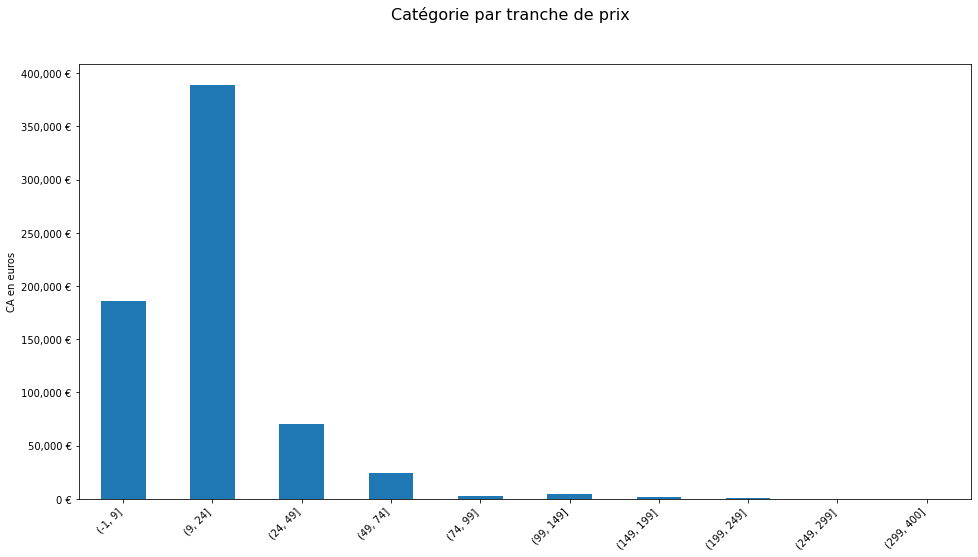

In [139]:
figure, axe = color_graph_background(1,1)

# Affichage du nombre CA par catégorie
d_price.plot(kind='bar', stacked=True)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euros")

figure.set_size_inches(16, 8, forward=True)
figure.suptitle("Catégorie par tranche de prix", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

Les catégories correspondent à des tranches de prix bien définies

### 1.4.2. Age / Catégories

In [140]:
sorter_age = create_sorter_age()
sorter_age

['<10 ans',
 'de 10 à 20 ans',
 'de 20 à 30 ans',
 'de 30 à 40 ans',
 'de 40 à 50 ans',
 'de 50 à 60 ans',
 'de 60 à 70 ans',
 'de 70 à 80 ans',
 '+80 ans']

In [141]:
df_global_index['tranche_age'] = df_global_index['birth'].map(category_age)
df_global_index.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age
date,,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20,< 10 €,de 30 à 40 ans
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20,< 10 €,de 30 à 40 ans
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20,< 10 €,de 30 à 40 ans
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18,< 10 €,de 30 à 40 ans
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18,< 10 €,de 30 à 40 ans


In [142]:
df_global_index_sort_tranche_age = df_global_index.copy()
df_global_index_sort_tranche_age['tranche_age'] = df_global_index_sort_tranche_age['tranche_age'].astype("category")
df_global_index_sort_tranche_age['tranche_age'] = df_global_index_sort_tranche_age['tranche_age'].cat.set_categories(sorter_age)
df_global_index_sort_tranche_age = df_global_index_sort_tranche_age.sort_values('tranche_age')
df_global_index_sort_tranche_age

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age
date,,,,,,,,,,,,
2022-05-09 02:10:19.603086,c_2589,f,2004,s_205747,2_79,2,55.99,2022-05,2022,2022-05-09,de 50 à 75 €,de 10 à 20 ans
2021-08-26 01:01:45.968311,c_7171,m,2002,s_80694,2_209,2,69.99,2021-08,2021,2021-08-26,de 50 à 75 €,de 10 à 20 ans
2021-10-10 07:34:47.183635,c_1046,m,2004,s_102634,2_184,2,49.61,2021-10,2021,2021-10-10,de 25 à 50 €,de 10 à 20 ans
2021-07-01 11:32:17.615058,c_1046,m,2004,s_56369,0_2264,0,9.93,2021-07,2021,2021-07-01,< 10 €,de 10 à 20 ans
2023-02-01 11:32:17.615058,c_1046,m,2004,s_335377,0_2264,0,9.93,2023-02,2023,2023-02-01,< 10 €,de 10 à 20 ans
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28 05:09:03.892066,c_5562,f,1938,s_303900,0_1212,0,6.31,2022-11,2022,2022-11-28,< 10 €,+80 ans
2022-03-28 05:09:03.892066,c_5562,f,1938,s_185639,0_1212,0,6.31,2022-03,2022,2022-03-28,< 10 €,+80 ans
2022-02-28 05:09:03.892066,c_5562,f,1938,s_172032,0_1212,0,6.31,2022-02,2022,2022-02-28,< 10 €,+80 ans


In [143]:
df_global_index_sort_tranche_age_temp = df_global_index_sort_tranche_age.copy()
df_global_index_sort_tranche_age_temp['tranche_age'] = df_global_index_sort_tranche_age_temp['tranche_age'].astype("object")

In [144]:
cate = df_global_index_sort_tranche_age_temp['categ'].unique()
cate = sorted(cate)
cate

[0, 1, 2]

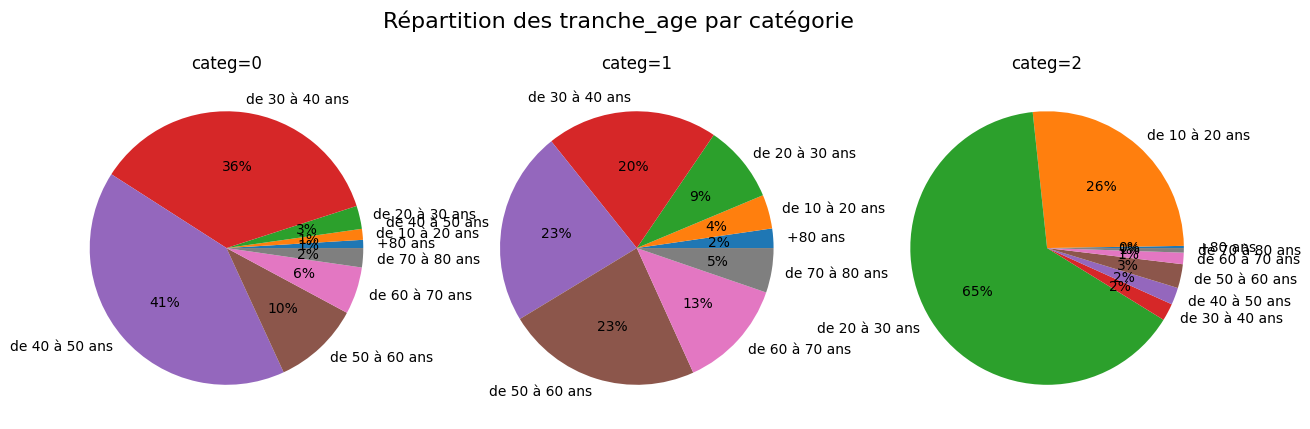

draw_pie_multiple_by_value categ  ................................................. END


In [145]:
draw_pie_multiple_by_value(df_global_index_sort_tranche_age_temp,'categ', cate, 'tranche_age', "Répartition des tranche_age par catégorie", legend=False, verbose=verbose)

In [146]:
df_ca_age = df_global_index_sort_tranche_age.groupby(['tranche_age', 'categ'])['price'].agg(['sum', 'mean','count'])
df_ca_age = df_ca_age.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres achetes"})
df_ca_age

ca  prix moyen  nb livres achetes
tranche_age    categ                                           
<10 ans        0            0.00         NaN                  0
               1            0.00         NaN                  0
               2            0.00         NaN                  0
de 10 à 20 ans 0        56724.45   10.616592               5343
               1       188324.01   20.649563               9120
               2       726338.36   75.338488               9641
de 20 à 30 ans 0       121081.87   10.666127              11352
               1       426773.55   20.463848              20855
               2      1775595.96   75.425681              23541
de 30 à 40 ans 0      1591527.93   10.656150             149353
               1       941086.57   20.452624              46013
               2        66618.37   89.061992                748
de 40 à 50 ans 0      1803554.57   10.605464             170059
               1      1066262.32   20.462545              52108
               2        67681.91   91.709905                738
de 50 à 60 ans 0       455579.64   10.659327              42740
               1      1076773.85   20.527965              52454
               2        81718.23   79.184331               1032
de 60 à 70 ans 0       247406.17   10.684322              23156
               1       602966.58   20.479115              29443
               2        41735.32   84.484453                494
de 70 à 80 ans 0       101479.50   10.727220               9460
               1       244042.46   20.403182              11961
               2        13733.67   70.069745                196
+80 ans        0        42376.84   10.604815               3996
               1       107493.35   20.612339               5215
               2         6853.20   73.690323                 93

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


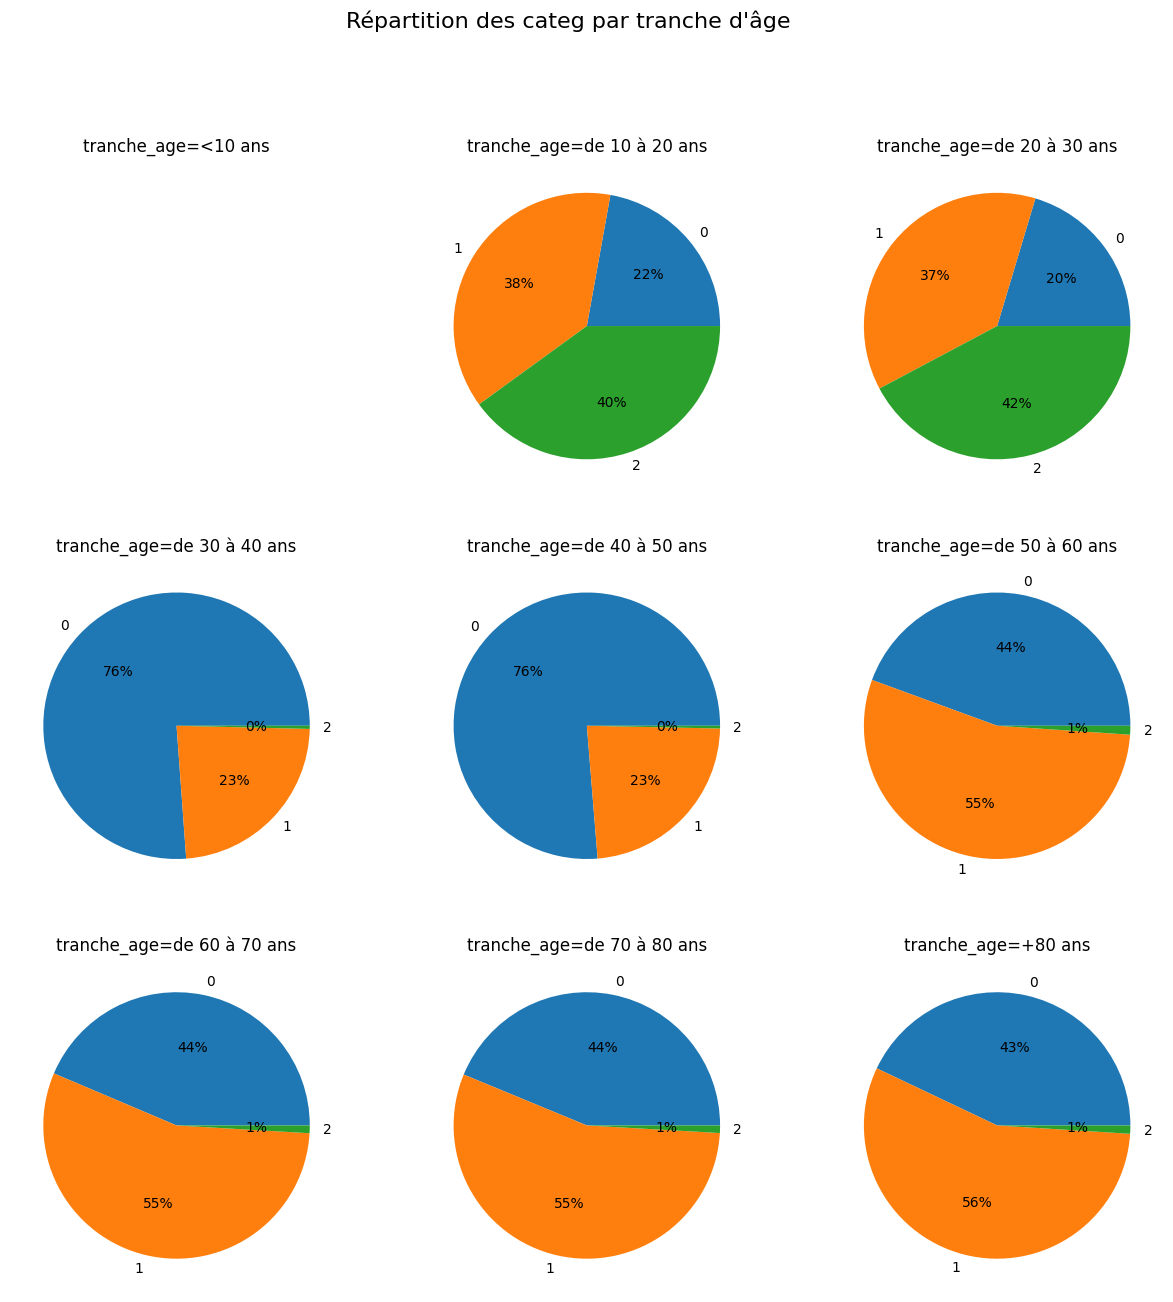

draw_pie_multiple_by_value tranche_age  ................................................. END


In [147]:
draw_pie_multiple_by_value(df_global_index_sort_tranche_age,'tranche_age', sorter_age, 'categ', "Répartition des categ par tranche d'âge", legend=False, verbose=verbose, max_col=3)

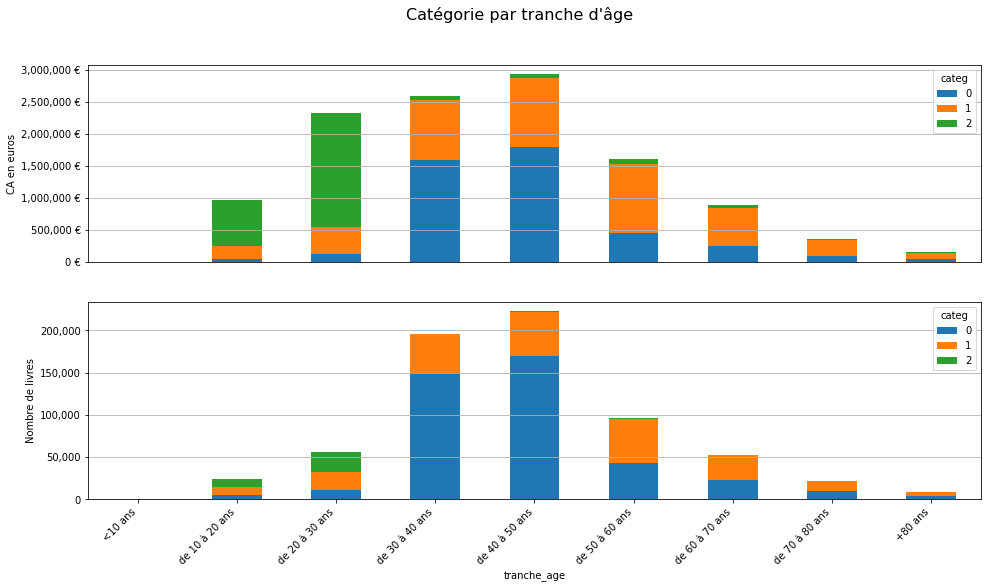

In [148]:
draw_bar_tranches(df_global_index_sort_tranche_age, ['tranche_age', 'categ'], sum_col='price', count_col='categ', unstack_col='categ', suptitle="Catégorie par tranche d'âge")

### 1.4.3. CA par sexe

In [149]:
df_global_index[~df_global_index["sex"].isna()]["sex"].value_counts()

m    340826
f    338285
Name: sex, dtype: int64

In [150]:
# DF Globale
column_name ="sex"
df_1 = df_global_index.groupby([column_name])['price'].agg(['sum', 'mean','count'])
df_1 = df_1.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres achetes"})
# DF sans octobre
df_2 = df_global_index_less_10.groupby([column_name])['price'].agg(['sum', 'mean','count'])
df_2 = df_2.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres achetes"})
df_2['ca'].head()

sex
f    5448955.66
m    5576056.51
Name: ca, dtype: float64

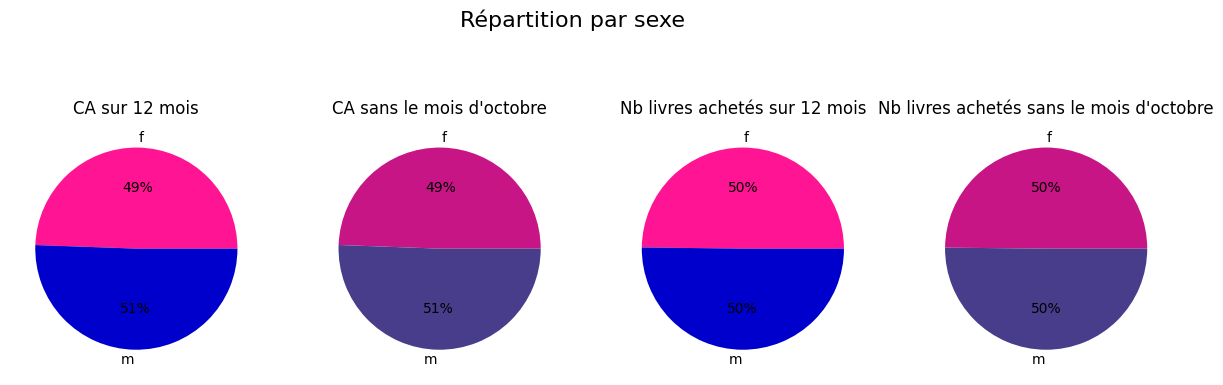

In [151]:
column_name ="sex"
colors=["deeppink", "mediumblue"]
colors2=["mediumvioletred", "darkslateblue"]

figure, axes = color_graph_background(1,4)

axes[0].pie(df_1['ca'], labels=df_1.index, autopct='%.0f%%', colors=colors)
axes[0].title.set_text('CA sur 12 mois')
axes[1].pie(df_2['ca'], labels=df_2.index, autopct='%.0f%%', colors=colors2)
axes[1].title.set_text("CA sans le mois d'octobre")

axes[2].pie(df_1['nb livres achetes'], labels=df_1.index, autopct='%.0f%%', colors=colors)
axes[2].title.set_text('Nb livres achetés sur 12 mois')
axes[3].pie(df_2['nb livres achetes'], labels=df_2.index, autopct='%.0f%%', colors=colors2)
axes[3].title.set_text("Nb livres achetés sans le mois d'octobre")

figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Répartition par sexe", fontsize=16)
plt.show()

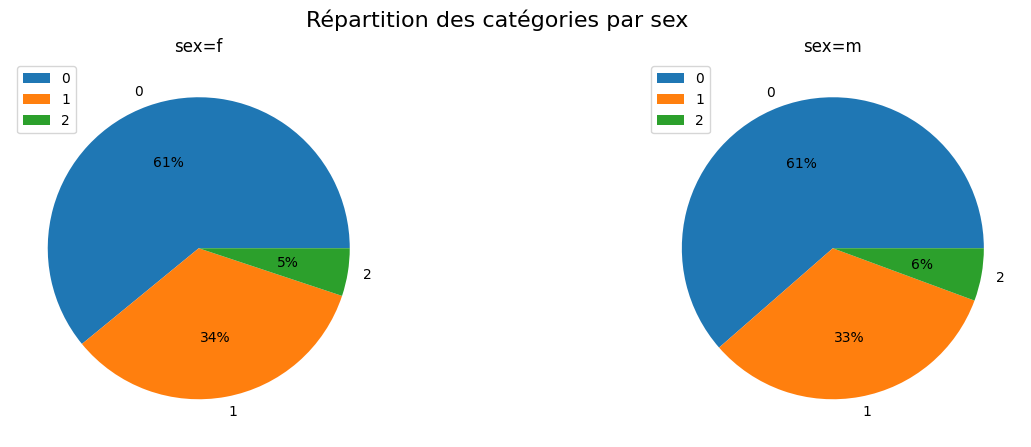

draw_pie_multiple_by_value sex  ................................................. END


In [152]:
draw_pie_multiple_by_value(df_global_index,'sex', df_global_index['sex'].unique(), 'categ', "Répartition des catégories par sex", verbose=verbose)

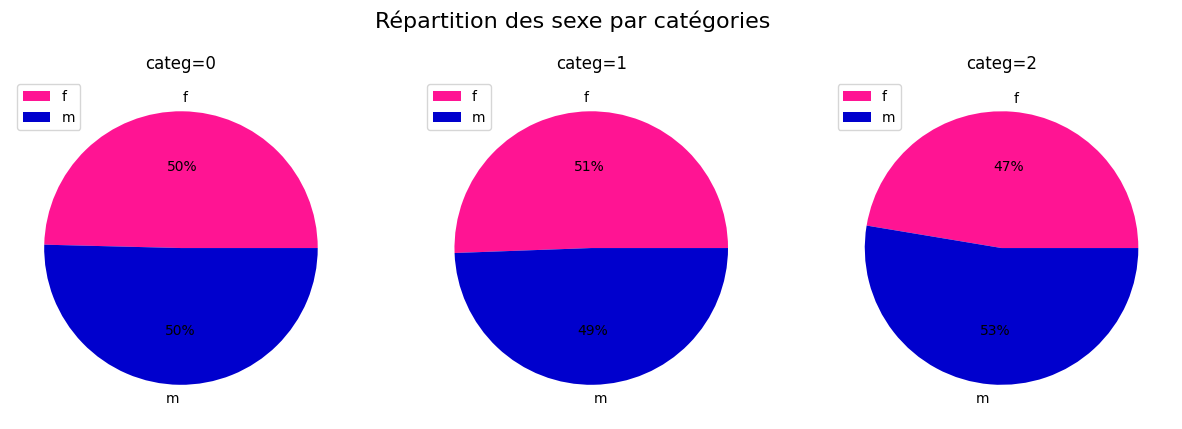

draw_pie_multiple_by_value categ  ................................................. END


In [153]:
colors=["deeppink", "mediumblue"]
draw_pie_multiple_by_value(df_global_index,'categ', df_global_index['categ'].unique(), 'sex', "Répartition des sexe par catégories", verbose=verbose, colors=colors)

### 1.4.4. CA par catégorie

In [154]:
df_ca_categ2 = df_global_index.groupby(['categ'])['price'].agg(['sum', 'mean','count'])
df_ca_categ2 = df_ca_categ2.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres achetes"})
df_ca_categ2

,ca,prix moyen,nb livres achetes
categ,,,
0,4419730.97,10.638188,415459
1,4653722.69,20.485730,227169
2,2780275.02,76.207412,36483


In [155]:
df_ca_categ2.index

Int64Index([0, 1, 2], dtype='int64', name='categ')

In [156]:
df_ca_categ3 = df_global_index_less_10.groupby(['categ'])['price'].agg(['sum', 'mean','count'])
df_ca_categ3 = df_ca_categ3.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres achetes"})
df_ca_categ3

,ca,prix moyen,nb livres achetes
categ,,,
0,4033050.97,10.640369,379033
1,4420350.71,20.485736,215777
2,2571610.49,76.222968,33738


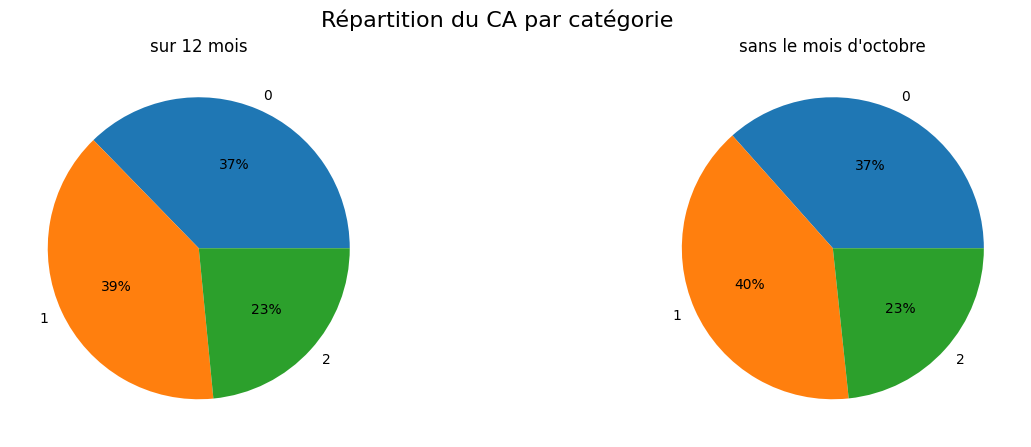

In [157]:
figure, axes = color_graph_background(1,2)
axes[0].pie(df_ca_categ2['ca'], labels=df_ca_categ2.index, autopct='%.0f%%')
axes[0].title.set_text('sur 12 mois')

axes[1].pie(df_ca_categ3['ca'], labels=df_ca_categ3.index, autopct='%.0f%%')
axes[1].title.set_text("sans le mois d'octobre")

figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Répartition du CA par catégorie", fontsize=16)
plt.show()

Avec ou sans les mois d'octobre, les ratios sont les mêmes entre les 3 catégories

### 1.4.5. Flops et les Tops

In [158]:
print(not_sales_product.shape)
not_sales_product.head()

(21, 7)


,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaN,NaN,NaN,1.15,0.0,right_only


Il y a **21 produits non vendus**    
Produits les moins vendus

In [159]:
group_produits = df_global_index.groupby(['id_prod'])['price'].agg(['sum', 'count'])
group_produits = group_produits.rename(columns={"sum": "ca", "count":"nb livres vendus"})
group_produits = group_produits.sort_values(by="nb livres vendus", ascending=True)
group_produits.head()

,ca,nb livres vendus
id_prod,,
0_2201,20.99,1
0_1601,1.99,1
0_549,2.99,1
2_81,86.99,1
0_807,1.99,1


#### 1.4.5.1 En nombre de livres vendus

In [160]:
nb_total_livre_vendu = group_produits["nb livres vendus"].sum()
nb_total_livre_vendu

679111

In [161]:
group_produits["% livre vendu"] = (group_produits["nb livres vendus"]/nb_total_livre_vendu)*100
group_produits.head()

,ca,nb livres vendus,% livre vendu
id_prod,,,
0_2201,20.99,1,0.000147
0_1601,1.99,1,0.000147
0_549,2.99,1,0.000147
2_81,86.99,1,0.000147
0_807,1.99,1,0.000147


In [162]:
group_produits.describe()

,ca,nb livres vendus,% livre vendu
count,3265.000000,3265.000000,3265.000000
mean,3630.544772,207.997243,0.030628
std,7371.925385,331.361777,0.048793
min,0.990000,1.000000,0.000147
25%,233.820000,17.000000,0.002503
50%,796.860000,57.000000,0.008393
75%,3408.600000,239.000000,0.035193
max,94893.500000,2252.000000,0.331610


In [163]:
flop_value = 17
top_value = 239
print(group_produits.shape)
print("Flop :",group_produits[group_produits["nb livres vendus"]<flop_value].shape, " / Top :", group_produits[group_produits["nb livres vendus"]>top_value].shape)

(3265, 3)
Flop : (810, 3)  / Top : (816, 3)


On voit avec le describe que si l'on prend le premier quart (le flop), concerne les livres qui se sont vendus à moins de 17 exemplaires
Et le top (dernier quart) sont les livres qui se sont vendus à plus de 239 exemplaires

#### 1.4.5.2 En CA de livres vendus

In [164]:
ca_total_livre_vendu = group_produits["ca"].sum()
ca_total_livre_vendu

11853728.680000002

In [165]:
group_produits["% ca"] = (group_produits["ca"]/ca_total_livre_vendu)*100
group_produits.head()

,ca,nb livres vendus,% livre vendu,% ca
id_prod,,,,
0_2201,20.99,1,0.000147,0.000177
0_1601,1.99,1,0.000147,0.000017
0_549,2.99,1,0.000147,0.000025
2_81,86.99,1,0.000147,0.000734
0_807,1.99,1,0.000147,0.000017


In [166]:
group_produits.describe()

,ca,nb livres vendus,% livre vendu,% ca
count,3265.000000,3265.000000,3265.000000,3265.000000
mean,3630.544772,207.997243,0.030628,0.030628
std,7371.925385,331.361777,0.048793,0.062191
min,0.990000,1.000000,0.000147,0.000008
25%,233.820000,17.000000,0.002503,0.001973
50%,796.860000,57.000000,0.008393,0.006722
75%,3408.600000,239.000000,0.035193,0.028756
max,94893.500000,2252.000000,0.331610,0.800537


In [167]:
flop_ca = 233
top_ca = 3408
print(group_produits.shape)
print("Flop :",group_produits[group_produits["ca"]<flop_ca].shape, " / Top :", group_produits[group_produits["ca"]>top_ca].shape)

(3265, 4)
Flop : (814, 4)  / Top : (817, 4)


l'idéal est d'identifier les livres qui ont peu été vendus et qui ont peu de CA

In [168]:
print(group_produits.shape)
super_flop = group_produits[group_produits["ca"]<flop_ca]
super_flop = super_flop[super_flop["nb livres vendus"]<flop_value]

super_top = group_produits[group_produits["ca"]>top_ca]
super_top = super_top[super_top["nb livres vendus"]<flop_value]
print("Flop :",super_flop.shape, " / Top :", super_top.shape)

(3265, 4)
Flop : (570, 4)  / Top : (1, 4)


In [169]:
super_top

,ca,nb livres vendus,% livre vendu,% ca
id_prod,,,,
2_2,4500.0,15,0.002209,0.037963


In [170]:
super_flop = super_flop.sort_values(by=['% ca', '% livre vendu'])
super_flop.head(20)

,ca,nb livres vendus,% livre vendu,% ca
id_prod,,,,
0_1539,0.99,1,0.000147,0.000008
0_1284,1.38,1,0.000147,0.000012
0_1653,1.98,2,0.000295,0.000017
0_1601,1.99,1,0.000147,0.000017
0_807,1.99,1,0.000147,0.000017
0_541,1.99,1,0.000147,0.000017
0_1728,2.27,1,0.000147,0.000019
0_1498,2.48,1,0.000147,0.000021
0_898,2.54,2,0.000295,0.000021


Nous avons maintenant la liste des livres qui ont le moins de CA et qui sont le moins vendu.
Ce qui permettrait de prendre des décisions par rapport à ces livres

In [171]:
type(group_produits)

pandas.core.frame.DataFrame

# 2. Une analyse des clients

Comprendre le comportement des clients en ligne
Comparaison avec le comportement des cliens en librairie

1. Genre d'un client et catégorie de livre acheté (cf. § 1.4.3)
1. Age d'un client et montant total des achats (cf. § 1.4.2)
1. Age catégorie de livre acheté (cf. § 1.4.2)
1. Age fréquance d'achat
1. Age taille du panier moyen


## 2.1. Age : Repartition âge

Quelle proportion d'âge est la plus présente et pourquoi à votre avis ?

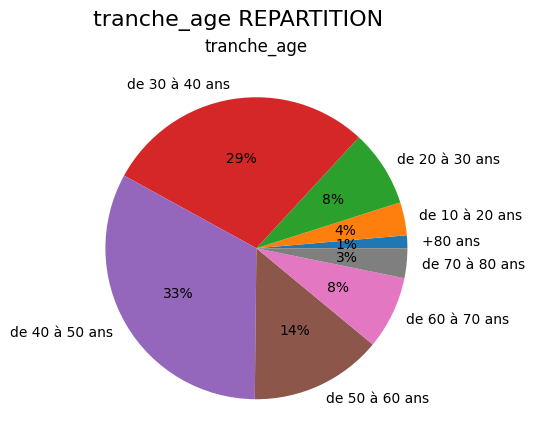

draw_pie tranche_age  ................................................. END


In [172]:
draw_pie_multiple(df_global_index, ['tranche_age'],colors=None, verbose=verbose, legend=False)

In [173]:
df_global_index["age"] = 2021 - df_global_index["birth"]
df_global_index.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age,age
date,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20,< 10 €,de 30 à 40 ans,35
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20,< 10 €,de 30 à 40 ans,35
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20,< 10 €,de 30 à 40 ans,35
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18,< 10 €,de 30 à 40 ans,35
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18,< 10 €,de 30 à 40 ans,35


In [174]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [175]:
df_customers_analyse = df_customers.copy()
df_customers_analyse["age"]  = 2021 - df_customers_analyse["birth"]
df_customers_analyse = df_customers_analyse.sort_values(by="age")
df_customers_analyse.head()

,client_id,sex,birth,age
1920,c_3923,f,2004,17
7318,c_1358,f,2004,17
1045,c_7765,m,2004,17
1049,c_3004,m,2004,17
1053,c_3329,m,2004,17


In [176]:
colors_list = []
nb_age = len(df_global_index['age'].unique())
for i in range(0, nb_age):
    colors_list.append(cm.hsv(i/nb_age))

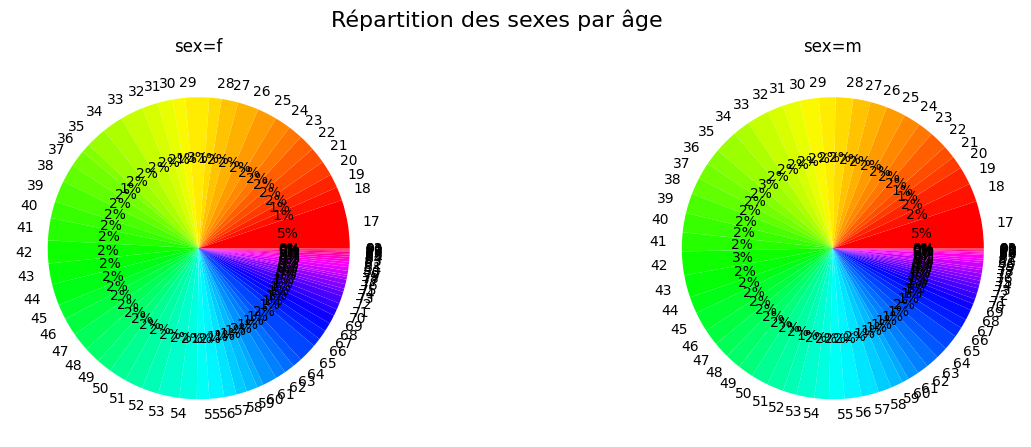

draw_pie_multiple_by_value sex  ................................................. END


In [177]:
draw_pie_multiple_by_value(df_customers_analyse,'sex', df_global_index['sex'].unique(), 'age', "Répartition des sexes par âge", verbose=verbose, colors=colors_list, legend=False)

In [178]:
df_customer_age = pd.crosstab(df_customers_analyse['age'],df_customers_analyse['sex'])
df_customer_age.head()

sex,f,m
age,,
17,232,208
18,65,81
19,66,80
20,72,57
21,78,58


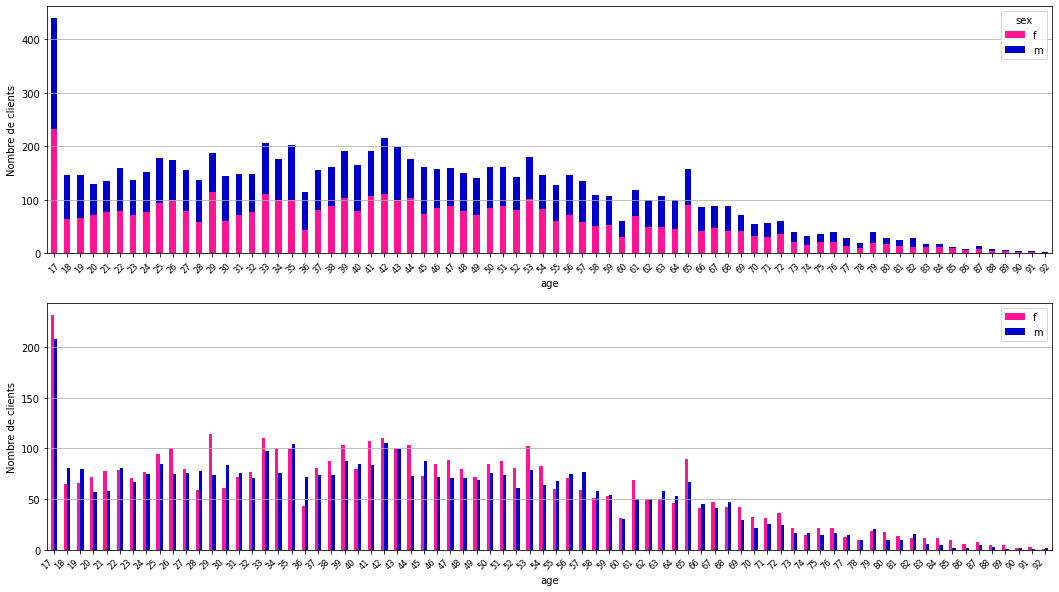

In [179]:
fig, axes = color_graph_background(2, 1)
fig.set_size_inches(18, 10, forward=True)
ax = axes[0]
df_customer_age.plot(kind='bar',stacked=True, ax=ax, color=colors)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
ax.set_ylabel("Nombre de clients")
ax.grid(axis='y')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_size('small')


ax = axes[1]
df_customer_age.plot(kind='bar', ax=ax, color=colors)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
ax.set_ylabel("Nombre de clients")
ax.grid(axis='y')

plt.xticks(rotation=45, ha="right", size='small')
plt.legend()
plt.show()

Il semble y avoir une particularité pour la tranche de 17 ans

In [180]:
df_global_index

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age,age
date,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20,< 10 €,de 30 à 40 ans,35
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20,< 10 €,de 30 à 40 ans,35
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20,< 10 €,de 30 à 40 ans,35
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18,< 10 €,de 30 à 40 ans,35
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18,< 10 €,de 30 à 40 ans,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23 07:01:38.963669,c_4391,f,2001,s_65994,2_147,2,181.99,2021-07,2021,2021-07-23,de 150 à 200 €,de 20 à 30 ans,20
2022-03-25 18:07:25.880052,c_1232,f,1960,s_184472,0_142,0,19.85,2022-03,2022,2022-03-25,de 10 à 25 €,de 60 à 70 ans,61
2021-09-25 18:07:25.880052,c_1232,f,1960,s_95415,0_142,0,19.85,2021-09,2021,2021-09-25,de 10 à 25 €,de 60 à 70 ans,61


In [181]:
df_17 = df_global_index[df_global_index["age"]==17]
print(df_17.shape)
df_17.head()

(15149, 13)


,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age,age
date,,,,,,,,,,,,,
2021-12-31 22:27:43.118944,c_8437,f,2004,s_143083,0_1518,0,4.18,2021-12,2021,2021-12-31,< 10 €,de 10 à 20 ans,17
2021-12-31 22:53:37.441675,c_8437,f,2004,s_143083,0_1443,0,5.99,2021-12,2021,2021-12-31,< 10 €,de 10 à 20 ans,17
2021-12-31 22:34:56.294595,c_8437,f,2004,s_143083,0_1474,0,9.88,2021-12,2021,2021-12-31,< 10 €,de 10 à 20 ans,17
2021-12-31 22:31:41.975716,c_8437,f,2004,s_143083,1_721,1,21.99,2021-12,2021,2021-12-31,de 10 à 25 €,de 10 à 20 ans,17
2021-06-16 14:24:29.332462,c_8437,f,2004,s_49498,2_41,2,68.99,2021-06,2021,2021-06-16,de 50 à 75 €,de 10 à 20 ans,17


In [182]:
df_17["client_id"].nunique()

437

In [183]:
df_17["categ"].value_counts()

2    6012
1    5719
0    3418
Name: categ, dtype: int64

In [184]:
print("2021:", df_17.loc["2021"]["price"].sum())
print("2022:", df_17.loc["2022"]["price"].sum())
print("2023:", df_17.loc["2023"]["price"].sum())

2021: 241265.83000000002
2022: 311613.53
2023: 56134.33


Il est fort possible que tous les mineurs aient été intégrés dans cette tranche d'age.    
Il faudrait vérifier l'information avec les sachant de la librairie

In [185]:
df_global_index

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age,age
date,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20,< 10 €,de 30 à 40 ans,35
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20,< 10 €,de 30 à 40 ans,35
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20,< 10 €,de 30 à 40 ans,35
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18,< 10 €,de 30 à 40 ans,35
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18,< 10 €,de 30 à 40 ans,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23 07:01:38.963669,c_4391,f,2001,s_65994,2_147,2,181.99,2021-07,2021,2021-07-23,de 150 à 200 €,de 20 à 30 ans,20
2022-03-25 18:07:25.880052,c_1232,f,1960,s_184472,0_142,0,19.85,2022-03,2022,2022-03-25,de 10 à 25 €,de 60 à 70 ans,61
2021-09-25 18:07:25.880052,c_1232,f,1960,s_95415,0_142,0,19.85,2021-09,2021,2021-09-25,de 10 à 25 €,de 60 à 70 ans,61


In [186]:
df_global_index["age_reel_an"] = df_global_index["year"]-df_global_index["birth"]
df_global_index["age_reel_an"] = df_global_index["age_reel_an"].astype(str)
df_global_index["age_reel_an"] = df_global_index["age_reel_an"].astype(int)
df_global_index.dtypes

client_id              object
sex                  category
birth                   int64
session_id             object
id_prod                object
categ                   int32
price                 float64
month_year          period[M]
year            period[A-DEC]
day                 period[D]
tranche_prix           object
tranche_age            object
age                     int64
age_reel_an             int32
dtype: object

In [187]:
df_customer_age_year = pd.crosstab(df_global_index['age'],df_global_index['year'])
df_customer_age_year.head()

year,2021,2022,2023
age,,,
17,5935,7851,1363
18,1785,2212,374
19,1833,2392,359
20,1664,2204,384
21,1742,2319,352


In [188]:
df_customer_rolling_age_year = pd.crosstab(df_global_index['age_reel_an'],df_global_index['year'])
df_customer_rolling_age_year.head()

year,2021,2022,2023
age_reel_an,,,
17,5935,0,0
18,1785,7851,0
19,1833,2212,1363
20,1664,2392,374
21,1742,2204,359


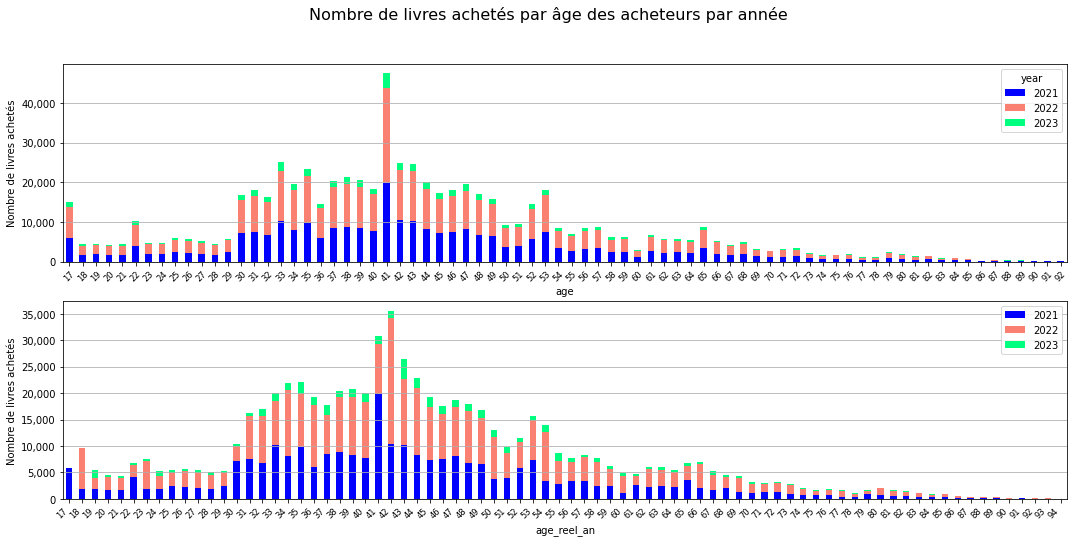

In [189]:
fig, axes = color_graph_background(2, 1)
fig.set_size_inches(18, 8, forward=True)
df_customer_age_year.plot(kind='bar',stacked=True, ax=axes[0], color=["blue", "salmon", "springgreen"])
df_customer_rolling_age_year.plot(kind='bar',stacked=True, ax=axes[1], color=["blue", "salmon", "springgreen"])
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
axes[0].set_ylabel("Nombre de livres achetés")
axes[0].grid(axis='y')
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_size('small')

axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
axes[1].set_ylabel("Nombre de livres achetés")
axes[1].grid(axis='y')

plt.xticks(rotation=45, ha="right", size='small')
fig.suptitle("Nombre de livres achetés par âge des acheteurs par année", fontsize=16)
plt.legend()
plt.show()

Il y a un impact sur le fait de calculer l'âge des clients par rapport à une année fixe (2021) ou l'âge par rapport à la date leur achat

## 2.3. Age et fréquence d'achat

In [190]:
df_global_index.head()

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age,age,age_reel_an
date,,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,c_103,f,1986,s_211425,0_1518,0,4.18,2022-05,2022,2022-05-20,< 10 €,de 30 à 40 ans,35,36
2021-07-20 13:21:29.043970,c_103,f,1986,s_64849,0_1518,0,4.18,2021-07,2021,2021-07-20,< 10 €,de 30 à 40 ans,35,35
2022-08-20 13:21:29.043970,c_103,f,1986,s_255965,0_1518,0,4.18,2022-08,2022,2022-08-20,< 10 €,de 30 à 40 ans,35,36
2022-06-18 01:49:37.823274,c_103,f,1986,s_225411,0_1418,0,8.57,2022-06,2022,2022-06-18,< 10 €,de 30 à 40 ans,35,36
2021-08-18 01:49:37.823274,c_103,f,1986,s_77214,0_1418,0,8.57,2021-08,2021,2021-08-18,< 10 €,de 30 à 40 ans,35,35


In [192]:
df_global_index.describe(include="all")

,client_id,sex,birth,session_id,id_prod,categ,price,month_year,year,day,tranche_prix,tranche_age,age,age_reel_an
count,679111,679111,679111.000000,679111,679111,679111.000000,679111.000000,679111,679111,679111,679111,679111,679111.000000,679111.000000
unique,8600,2,NaN,342275,3265,NaN,NaN,24,3,730,10,8,NaN,NaN
top,c_1609,m,NaN,s_118668,1_369,NaN,NaN,2021-09,2022,2022-11-30,de 10 à 25 €,de 40 à 50 ans,NaN,NaN
freq,25488,340826,NaN,14,2252,NaN,NaN,33314,346380,1311,375444,222905,NaN,NaN
mean,NaN,NaN,1977.811149,NaN,NaN,0.441953,17.454773,NaN,NaN,NaN,NaN,NaN,43.188851,43.859354
std,NaN,NaN,13.575361,NaN,NaN,0.595042,18.328998,NaN,NaN,NaN,NaN,NaN,13.575361,13.591033
min,NaN,NaN,1929.000000,NaN,NaN,0.000000,0.620000,NaN,NaN,NaN,NaN,NaN,17.000000,17.000000
25%,NaN,NaN,1970.000000,NaN,NaN,0.000000,8.870000,NaN,NaN,NaN,NaN,NaN,34.000000,35.000000
50%,NaN,NaN,1980.000000,NaN,NaN,0.000000,13.990000,NaN,NaN,NaN,NaN,NaN,41.000000,42.000000
75%,NaN,NaN,1987.000000,NaN,NaN,1.000000,18.990000,NaN,NaN,NaN,NaN,NaN,51.000000,51.000000


il faut récupérer les clients de manière unique et unitaire par jour

In [198]:
age_freq = df_global_index[["day","client_id", "sex", "tranche_age", "age", "age_reel_an"]]
age_freq = age_freq.reset_index()
age_freq = age_freq.drop("date", axis=1)
age_freq

,day,client_id,sex,tranche_age,age,age_reel_an
0,2022-05-20,c_103,f,de 30 à 40 ans,35,36
1,2021-07-20,c_103,f,de 30 à 40 ans,35,35
2,2022-08-20,c_103,f,de 30 à 40 ans,35,36
3,2022-06-18,c_103,f,de 30 à 40 ans,35,36
4,2021-08-18,c_103,f,de 30 à 40 ans,35,35
...,...,...,...,...,...,...
679106,2021-07-23,c_4391,f,de 20 à 30 ans,20,20
679107,2022-03-25,c_1232,f,de 60 à 70 ans,61,62
679108,2021-09-25,c_1232,f,de 60 à 70 ans,61,61
679109,2021-03-11,c_7534,m,de 20 à 30 ans,29,29


In [230]:
age_freq3 = age_freq.drop_duplicates()
age_freq3 = age_freq3.reset_index()
age_freq3 = age_freq3.drop("index", axis=1)
age_freq3

,day,client_id,sex,tranche_age,age,age_reel_an
0,2022-05-20,c_103,f,de 30 à 40 ans,35,36
1,2021-07-20,c_103,f,de 30 à 40 ans,35,35
2,2022-08-20,c_103,f,de 30 à 40 ans,35,36
3,2022-06-18,c_103,f,de 30 à 40 ans,35,36
4,2021-08-18,c_103,f,de 30 à 40 ans,35,35
...,...,...,...,...,...,...
310518,2021-07-23,c_4391,f,de 20 à 30 ans,20,20
310519,2022-03-25,c_1232,f,de 60 à 70 ans,61,62
310520,2021-09-25,c_1232,f,de 60 à 70 ans,61,61
310521,2021-03-11,c_7534,m,de 20 à 30 ans,29,29


In [ ]:
age_freq2 = age_freq.drop_duplicates()
age_freq2 = age_freq2.reset_index()
age_freq2 = age_freq2.drop("index", axis=1)

In [227]:
age_freq_achat_group = age_freq2[["day","tranche_age", "age_reel_an", "client_id"]].groupby(["day", "tranche_age", "age_reel_an"])["client_id"].agg(['count'])
age_freq_achat_group = age_freq_achat_group.rename(columns={"count": "nb_acheteurs"})
print(age_freq_achat_group.shape)
age_freq_achat_group

(48563, 1)


nb_acheteurs
day        tranche_age    age_reel_an              
2021-03-01 +80 ans        80                      1
                          81                      5
                          82                      1
                          84                      2
                          85                      1
...                                             ...
2023-02-28 de 70 à 80 ans 76                      3
                          77                      2
                          78                      1
                          80                      1
                          81                      2

[48563 rows x 1 columns]

Il me faut le nombre de client en tout par âge par année

In [228]:
age_group = age_freq2[["tranche_age", "age_reel_an", "client_id"]].groupby(["tranche_age", "age_reel_an"])["client_id"].agg(['count'])
age_group = age_group.rename(columns={"count": "nb_clients"})
#age_group.reset_index(inplace=True)
print(age_group.shape)
age_group

(92, 1)


nb_clients
tranche_age    age_reel_an            
+80 ans        80                  506
               81                  986
               82                 1019
               83                  765
               84                  554
...                                ...
de 70 à 80 ans 77                 1067
               78                  798
               79                 1053
               80                  831
               81                  118

[92 rows x 1 columns]

In [229]:
age_group.columns

Index(['nb_clients'], dtype='object')

In [204]:
age_freq2.describe(include="all")

,day,client_id,sex,tranche_age,age,age_reel_an
count,310523,310523,310523,310523,310523.000000,310523.000000
unique,730,8600,2,8,NaN,NaN
top,2021-09-28,c_3454,f,de 40 à 50 ans,NaN,NaN
freq,493,730,161365,79254,NaN,NaN
mean,NaN,NaN,NaN,NaN,44.968682,45.638739
std,NaN,NaN,NaN,NaN,15.195058,15.208010
min,NaN,NaN,NaN,NaN,17.000000,17.000000
25%,NaN,NaN,NaN,NaN,34.000000,35.000000
50%,NaN,NaN,NaN,NaN,43.000000,44.000000
75%,NaN,NaN,NaN,NaN,55.000000,56.000000


Comment calculer la fréquence d'achat par tranche d'âge ?
il faut compter le nb sessions par client

In [ ]:
fig, axe = color_graph_background()
fig.set_size_inches(15, 6, forward=True)
ca_datas = df_ca.loc["2021","ca"].resample("W").agg(["mean", "std", "min", "max"])
ca_datas["mean"]["2021"].plot(label="moyenne par semaine", title="CA moyen par semaine en 2021")
plt.fill_between(ca_datas.index, ca_datas["max"], ca_datas["min"], alpha=0.2, label="min-max par semaine")
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euros")
plt.legend()
plt.show()

In [ ]:
df_transactions_control_group = df_transactions_control.groupby(['day', 'id_prod']).agg(['count'])
df_transactions_control_group = df_transactions_control_group.rename(columns={"count": "nb_livres"})
df_transactions_control_group.reset_index(inplace=True)

## 2.4. Age et taille panier moyen

In [138]:
df_global_index.columns

Index(['client_id', 'sex', 'birth', 'session_id', 'id_prod', 'categ', 'price',
       'month_year', 'day', 'tranche_prix', 'tranche_age'],
      dtype='object')

In [151]:
test5 = df_global_index.groupby(['tranche_age'])['client_id'].nunique()
test5

tranche_age
+80 ans            145
<20 ans            852
de 20 à 30 ans    1560
de 30 à 40 ans    1670
de 40 à 50 ans    1712
de 50 à 60 ans    1316
de 60 à 70 ans     966
de 70 à 80 ans     379
Name: client_id, dtype: int64

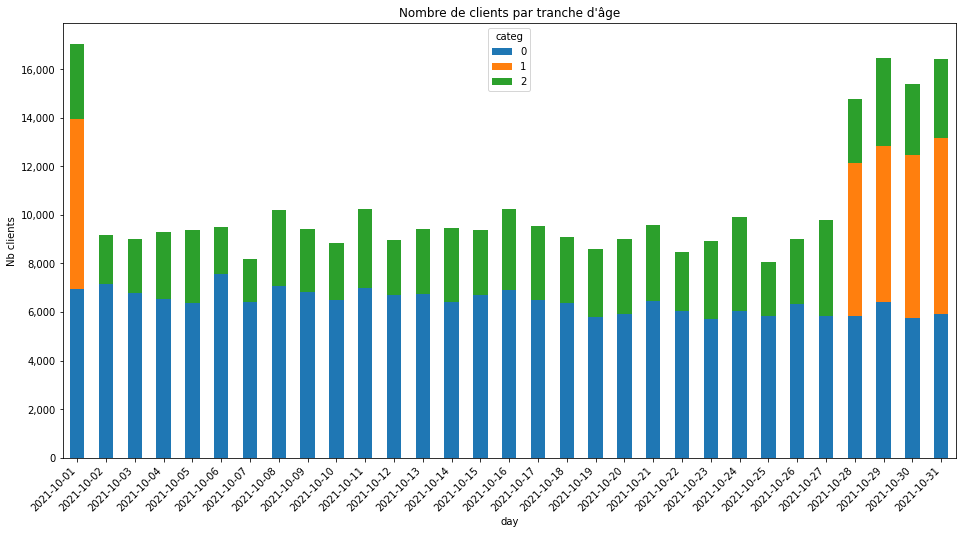

In [293]:
figure, axe = color_graph_background()
test5.plot(kind='bar', stacked=True, title="Nombre de clients par tranche d'âge", ax=axe)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f}". format(x)))
axe.set_ylabel("Nb clients")
figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.show()

In [153]:
test5 = df_global_index.groupby(['tranche_age', 'client_id'])['price'].sum()
test5

tranche_age     client_id
+80 ans         c_1063       2490.60
                c_1136        629.00
                c_1171        233.28
                c_1208       1709.11
                c_1213       1095.02
                              ...   
de 70 à 80 ans  c_87          805.12
                c_949        1082.18
                c_960         523.75
                c_979        1120.79
                c_984         787.43
Name: price, Length: 8600, dtype: float64

In [154]:
figure, axe = color_graph_background()
test5.plot(kind='bar', stacked=True, title="Ca par tranche d'âge", ax=axe)
figure.set_size_inches(16, 8, forward=True)
axe.yaxis.set_major_formatter(FuncFormatter(lambda x, p: "{:,.0f} €". format(x)))
axe.set_ylabel("CA en euros")
plt.xticks(rotation=45, ha="right")
plt.show()

KeyboardInterrupt: 

In [151]:
df_ca_client = df_global_index.groupby(['client_id'])['price'].agg(['sum', 'mean','count'])
df_ca_client = df_ca_client.rename(columns={"sum": "ca", "mean":"prix moyen", "count":"nb livres achetes"})
df_ca_client.describe(include="all")

,ca,prix moyen,nb livres achetes
count,8600.000000,8600.000000,8600.000000
mean,1378.340544,22.024390,78.966395
std,5182.542488,15.006754,312.402910
min,6.310000,4.150000,1.000000
25%,547.630000,13.360135,27.000000
50%,1027.020000,15.794981,51.000000
75%,1779.500000,22.043137,96.000000
max,324033.350000,181.990000,25488.000000


In [149]:
df_ca_client = df_ca_client.sort_values("ca", ascending=False)
df_ca_client.head()

,ca,prix moyen,nb livres achetes
client_id,,,
c_1609,324033.35,12.713173,25488
c_4958,289760.34,55.776774,5195
c_6714,153598.92,16.730086,9181
c_3454,113637.93,16.785514,6770
c_3263,5276.87,13.093970,403


In [150]:
df_ca_client = df_ca_client.sort_values("nb livres achetes", ascending=False)
df_ca_client.head()

,ca,prix moyen,nb livres achetes
client_id,,,
c_1609,324033.35,12.713173,25488
c_6714,153598.92,16.730086,9181
c_3454,113637.93,16.785514,6770
c_4958,289760.34,55.776774,5195
c_3263,5276.87,13.093970,403


In [146]:
df_ca_client[df_ca_client["ca"] == df_ca_client["ca"].max()]

,ca,prix moyen,nb livres achetes
client_id,,,
c_1609,324033.35,12.713173,25488
